In [ ]:
# Clean the crime data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Importing packages and library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
plt.figure(figsize=(14, 7))
sns.set(rc={'figure.figsize':(14, 7)})


<Figure size 1400x700 with 0 Axes>

In [ ]:
# Loading data
my_data = "/content/gdrive/MyDrive/CA_Psychedelic/Dataprep/newcrimedata.csv"
df = pd.read_csv(my_data)
df.head()
# df is my original sample - original ca crime data gotten from CA DOJ website

<ipython-input-4-8460a5276f8f>:3: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,69,70) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(my_data)


,Year,County,NCICCode,Month,Violent_sum,Homicide_sum,ForRape_sum,Robbery_sum,AggAssault_sum,Property_sum,...,MVPLARnao_sum,BILARnao_sum,FBLARnao_sum,COMLARnao_sum,AOLARnao_sum,LT400nao_sum,LT200400nao_sum,LT200nao_sum,LT50200nao_sum,LT50nao_sum
0,1985,Alameda County,Alameda Co. Sheriff's Department,1,24,0,0,15,9,299,...,6,18,2,0,24,46,41,NaN,35,39
1,1985,Alameda County,Alameda Co. Sheriff's Department,2,33,0,2,9,22,288,...,8,25,3,2,18,51,30,NaN,40,27
2,1985,Alameda County,Alameda Co. Sheriff's Department,3,53,1,2,22,28,362,...,15,19,5,2,32,57,38,NaN,47,34
3,1985,Alameda County,Alameda Co. Sheriff's Department,4,42,1,2,13,26,348,...,10,16,2,2,44,70,32,NaN,27,52
4,1985,Alameda County,Alameda Co. Sheriff's Department,5,22,0,3,6,13,333,...,8,14,5,0,40,53,35,NaN,30,63


In [ ]:
df.columns

Index(['Year', 'County', 'NCICCode', 'Month', 'Violent_sum', 'Homicide_sum',
       'ForRape_sum', 'Robbery_sum', 'AggAssault_sum', 'Property_sum',
       'Burglary_sum', 'VehicleTheft_sum', 'LTtotal_sum', 'ViolentClr_sum',
       'HomicideClr_sum', 'ForRapeClr_sum', 'RobberyClr_sum',
       'AggAssaultClr_sum', 'PropertyClr_sum', 'BurglaryClr_sum',
       'VehicleTheftClr_sum', 'LTtotalClr_sum', 'TotalStructural_sum',
       'TotalMobile_sum', 'TotalOther_sum', 'GrandTotal_sum',
       'GrandTotClr_sum', 'RAPact_sum', 'ARAPact_sum', 'FROBact_sum',
       'KROBact_sum', 'OROBact_sum', 'SROBact_sum', 'HROBnao_sum',
       'CHROBnao_sum', 'GROBnao_sum', 'CROBnao_sum', 'RROBnao_sum',
       'BROBnao_sum', 'MROBnao_sum', 'FASSact_sum', 'KASSact_sum',
       'OASSact_sum', 'HASSact_sum', 'FEBURact_Sum', 'UBURact_sum',
       'RESDBUR_sum', 'RNBURnao_sum', 'RDBURnao_sum', 'RUBURnao_sum',
       'NRESBUR_sum', 'NNBURnao_sum', 'NDBURnao_sum', 'NUBURnao_sum',
       'MVTact_sum', 'TMVTact_sum',

In [ ]:
# Display sorted unique values in the 'County' column
print(sorted(df['County'].unique()))


['Alameda County', 'Alpine County', 'Amador County', 'Butte County', 'Calaveras County', 'Colusa County', 'Contra Costa County', 'Del Norte County', 'El Dorado County', 'Fresno County', 'Glenn County', 'Humboldt County', 'Imperial County', 'Inyo County', 'Kern County', 'Kings County', 'Lake County', 'Lassen County', 'Los Angeles County', 'Madera County', 'Marin County', 'Mariposa County', 'Mendocino County', 'Merced County', 'Modoc County', 'Mono County', 'Monterey County', 'Napa County', 'Nevada County', 'Orange County', 'Placer County', 'Plumas County', 'Riverside County', 'Sacramento County', 'San Benito County', 'San Bernardino County', 'San Diego County', 'San Francisco County', 'San Joaquin County', 'San Luis Obispo County', 'San Mateo County', 'Santa Barbara County', 'Santa Clara County', 'Santa Cruz County', 'Shasta County', 'Sierra County', 'Siskiyou County', 'Solano County', 'Sonoma County', 'Stanislaus County', 'Sutter County', 'Tehama County', 'Trinity County', 'Tulare Coun

In [ ]:
# For Santa Clara County- Example
# Create a new column 'Agency' that duplicates the values of 'NCICCode'
df['Agency'] = df['NCICCode']

# Filter for 'Santa Clara County' and years 2017 to 2023
filtered_df = df[(df['County'] == 'Santa Clara County') & (df['Year'].between(2017, 2023))]

# Select the specific columns of interest
columns_of_interest = [
    'Year', 'County', 'Agency', 'NCICCode', 'FROBact_sum',
    'Month', 'Violent_sum', 'Homicide_sum', 'FASSact_sum', 'ViolentClr_sum',
    'ForRape_sum', 'Robbery_sum', 'AggAssault_sum', 'PropertyClr_sum',
    'Property_sum', 'Burglary_sum', 'VehicleTheft_sum', 'LTtotal_sum', 'GrandTotal_sum'
]
sc_df = filtered_df[columns_of_interest]

# Display the resulting DataFrame
print(sc_df)

# Save the filtered data to CSV
sc_df.to_csv('/content/gdrive/MyDrive/CA_Psychedelic/sc_county_2017_2023.csv', index=False)


        Year              County                                Agency  \
265421  2017  Santa Clara County  Santa Clara Co. Sheriff's Department   
265422  2017  Santa Clara County  Santa Clara Co. Sheriff's Department   
265423  2017  Santa Clara County  Santa Clara Co. Sheriff's Department   
265424  2017  Santa Clara County  Santa Clara Co. Sheriff's Department   
265425  2017  Santa Clara County  Santa Clara Co. Sheriff's Department   
...      ...                 ...                                   ...   
339852  2023  Santa Clara County       CA Highway Patrol - Santa Clara   
339853  2023  Santa Clara County       CA Highway Patrol - Santa Clara   
339854  2023  Santa Clara County       CA Highway Patrol - Santa Clara   
339855  2023  Santa Clara County       CA Highway Patrol - Santa Clara   
339856  2023  Santa Clara County       CA Highway Patrol - Santa Clara   

                                    NCICCode FROBact_sum  Month Violent_sum  \
265421  Santa Clara Co. Sheriff'

In [ ]:
# All Counties as seperate files

# Create a new column 'Agency' that duplicates the values of 'NCICCode'
df['Agency'] = df['NCICCode']

# Define the list of all counties
all_counties = [
    'Alameda County', 'Alpine County', 'Amador County', 'Butte County',
    'Calaveras County', 'Colusa County', 'Contra Costa County',
    'Del Norte County', 'El Dorado County', 'Fresno County', 'Glenn County',
    'Humboldt County', 'Imperial County', 'Inyo County', 'Kern County',
    'Kings County', 'Lake County', 'Lassen County', 'Los Angeles County',
    'Madera County', 'Marin County', 'Mariposa County', 'Mendocino County',
    'Merced County', 'Modoc County', 'Mono County', 'Monterey County',
    'Napa County', 'Nevada County', 'Orange County', 'Placer County',
    'Plumas County', 'Riverside County', 'Sacramento County',
    'San Benito County', 'San Bernardino County', 'San Diego County',
    'San Francisco County', 'San Joaquin County', 'San Luis Obispo County',
    'San Mateo County', 'Santa Barbara County', 'Santa Clara County',
    'Santa Cruz County', 'Shasta County', 'Sierra County', 'Siskiyou County',
    'Solano County', 'Sonoma County', 'Stanislaus County', 'Sutter County',
    'Tehama County', 'Trinity County', 'Tulare County', 'Tuolumne County',
    'Ventura County', 'Yolo County', 'Yuba County'
]

# Select the specific columns of interest
columns_of_interest = [
    'Year', 'County', 'Agency', 'NCICCode', 'FROBact_sum',
    'Month', 'Violent_sum', 'Homicide_sum', 'FASSact_sum', 'ViolentClr_sum',
    'ForRape_sum', 'Robbery_sum', 'AggAssault_sum', 'PropertyClr_sum',
    'Property_sum', 'Burglary_sum', 'VehicleTheft_sum', 'LTtotal_sum', 'GrandTotal_sum'
]

# Loop through each county and process the data
for county in all_counties:
    # Filter data for the current county and years 2017 to 2023
    filtered_df = df[(df['County'] == county) & (df['Year'].between(2017, 2023))]

    # Select the columns of interest
    county_df = filtered_df[columns_of_interest]

    # Display a preview of the resulting DataFrame
    print(f"Data for {county}:")
    print(county_df.head())

    # # Define the output file name, replacing spaces with underscores for file safety
    # filename = f"/content/gdrive/MyDrive/CA_Psychedelic/County/{county.replace(' ', '_').lower()}_2017_2023.csv"

    # # Save the filtered data to CSV
    # county_df.to_csv(filename, index=False)
    # print(f"Saved {county} data to {filename}")



Data for Alameda County:
      Year          County                            Agency  \
9125  2017  Alameda County  Alameda Co. Sheriff's Department   
9126  2017  Alameda County  Alameda Co. Sheriff's Department   
9127  2017  Alameda County  Alameda Co. Sheriff's Department   
9128  2017  Alameda County  Alameda Co. Sheriff's Department   
9129  2017  Alameda County  Alameda Co. Sheriff's Department   

                              NCICCode FROBact_sum  Month Violent_sum  \
9125  Alameda Co. Sheriff's Department           4      1          47   
9126  Alameda Co. Sheriff's Department           3      2          37   
9127  Alameda Co. Sheriff's Department           4      3          44   
9128  Alameda Co. Sheriff's Department           6      4          53   
9129  Alameda Co. Sheriff's Department           4      5          44   

     Homicide_sum FASSact_sum ViolentClr_sum ForRape_sum Robbery_sum  \
9125            1           9             21           1          16   
9126   

In [ ]:
county_counts = df['County'].value_counts()
print(county_counts)


County
Los Angeles County        47683
Orange County             18883
Riverside County          14509
San Bernardino County     14460
Contra Costa County       12142
San Diego County          11571
Santa Clara County        11241
Alameda County            10931
San Mateo County          10823
Fresno County              9297
Monterey County            8356
Ventura County             8182
Sonoma County              7857
Sacramento County          7104
Kern County                7010
San Luis Obispo County     6987
Marin County               6812
Stanislaus County          6443
Santa Barbara County       5990
Tulare County              5704
Siskiyou County            5630
Humboldt County            5226
San Joaquin County         5152
Merced County              5137
Solano County              4975
Butte County               4912
Imperial County            4556
Santa Cruz County          4457
Napa County                4106
Yolo County                3914
Placer County              3872
K

In [ ]:
# All Counties Together

# Create a new column 'Agency' that duplicates the values of 'NCICCode'
df['Agency'] = df['NCICCode']

# Define the list of all counties
all_counties = [
    'Alameda County', 'Alpine County', 'Amador County', 'Butte County',
    'Calaveras County', 'Colusa County', 'Contra Costa County',
    'Del Norte County', 'El Dorado County', 'Fresno County', 'Glenn County',
    'Humboldt County', 'Imperial County', 'Inyo County', 'Kern County',
    'Kings County', 'Lake County', 'Lassen County', 'Los Angeles County',
    'Madera County', 'Marin County', 'Mariposa County', 'Mendocino County',
    'Merced County', 'Modoc County', 'Mono County', 'Monterey County',
    'Napa County', 'Nevada County', 'Orange County', 'Placer County',
    'Plumas County', 'Riverside County', 'Sacramento County',
    'San Benito County', 'San Bernardino County', 'San Diego County',
    'San Francisco County', 'San Joaquin County', 'San Luis Obispo County',
    'San Mateo County', 'Santa Barbara County', 'Santa Clara County',
    'Santa Cruz County', 'Shasta County', 'Sierra County', 'Siskiyou County',
    'Solano County', 'Sonoma County', 'Stanislaus County', 'Sutter County',
    'Tehama County', 'Trinity County', 'Tulare County', 'Tuolumne County',
    'Ventura County', 'Yolo County', 'Yuba County'
]

# Select the specific columns of interest
columns_of_interest = [
    'Year', 'County', 'Agency', 'NCICCode', 'FROBact_sum',
    'Month', 'Violent_sum', 'Homicide_sum', 'FASSact_sum', 'ViolentClr_sum',
    'ForRape_sum', 'Robbery_sum', 'AggAssault_sum', 'PropertyClr_sum',
    'Property_sum', 'Burglary_sum', 'VehicleTheft_sum', 'LTtotal_sum', 'GrandTotal_sum'
]

# Create an empty list to store data from all counties
all_counties_data = []

# Loop through each county and process the data
for county in all_counties:
    # Filter data for the current county and years 2017 to 2023
    filtered_df = df[(df['County'] == county) & (df['Year'].between(2017, 2023))]

    # Select the columns of interest
    county_df = filtered_df[columns_of_interest]

    # Append county data to the list
    all_counties_data.append(county_df)

    # Display a preview of the resulting DataFrame
    print(f"Processed data for {county} with {len(county_df)} records.")

# Concatenate all county data into a single DataFrame
combined_df = pd.concat(all_counties_data, ignore_index=True)

# Display the combined dataset
print(f"Total combined data records: {len(combined_df)}")

# # Save the combined data to a single CSV file
# combined_df.to_csv('/content/gdrive/MyDrive/CA_Psychedelic/Dataprep/all_counties_2017_2023.csv', index=False)

# print("All counties data saved successfully!")


Processed data for Alameda County with 1806 records.
Processed data for Alpine County with 142 records.
Processed data for Amador County with 491 records.
Processed data for Butte County with 802 records.
Processed data for Calaveras County with 412 records.
Processed data for Colusa County with 410 records.
Processed data for Contra Costa County with 2090 records.
Processed data for Del Norte County with 252 records.
Processed data for El Dorado County with 408 records.
Processed data for Fresno County with 1782 records.
Processed data for Glenn County with 332 records.
Processed data for Humboldt County with 828 records.
Processed data for Imperial County with 710 records.
Processed data for Inyo County with 325 records.
Processed data for Kern County with 1310 records.
Processed data for Kings County with 637 records.
Processed data for Lake County with 325 records.
Processed data for Lassen County with 328 records.
Processed data for Los Angeles County with 8568 records.
Processed 

In [ ]:
county_counts = combined_df['County'].value_counts()
print(county_counts)

County
Los Angeles County        8568
Orange County             3473
Riverside County          2922
San Bernardino County     2718
San Diego County          2288
Contra Costa County       2090
Santa Clara County        1964
Alameda County            1806
Fresno County             1782
San Mateo County          1705
Ventura County            1499
Monterey County           1468
Sacramento County         1399
Sonoma County             1358
Kern County               1310
San Luis Obispo County    1246
Marin County              1100
Stanislaus County         1084
Santa Barbara County      1080
Siskiyou County           1050
Tulare County             1031
Merced County              883
San Joaquin County         859
Humboldt County            828
Solano County              820
Butte County               802
Napa County                758
Santa Cruz County          749
Imperial County            710
Yolo County                662
Placer County              662
Kings County               637
S

In [ ]:
combined_df.head()

,Year,County,Agency,NCICCode,FROBact_sum,Month,Violent_sum,Homicide_sum,FASSact_sum,ViolentClr_sum,ForRape_sum,Robbery_sum,AggAssault_sum,PropertyClr_sum,Property_sum,Burglary_sum,VehicleTheft_sum,LTtotal_sum,GrandTotal_sum
0,2017,Alameda County,Alameda Co. Sheriff's Department,Alameda Co. Sheriff's Department,4,1,47,1,9,21,1,16,29,15,191,36,73,82,1
1,2017,Alameda County,Alameda Co. Sheriff's Department,Alameda Co. Sheriff's Department,3,2,37,0,3,24,3,14,20,16,178,33,66,79,1
2,2017,Alameda County,Alameda Co. Sheriff's Department,Alameda Co. Sheriff's Department,4,3,44,1,8,23,-1,11,33,23,182,36,47,99,0
3,2017,Alameda County,Alameda Co. Sheriff's Department,Alameda Co. Sheriff's Department,6,4,53,0,6,36,3,13,37,19,185,35,47,103,1
4,2017,Alameda County,Alameda Co. Sheriff's Department,Alameda Co. Sheriff's Department,4,5,44,0,10,36,1,13,30,14,177,34,55,88,3


In [ ]:
# All the agencies

agency_list = combined_df['NCICCode'].unique().tolist()
print(agency_list)


["Alameda Co. Sheriff's Department", 'Alameda', 'Albany', 'Berkeley', 'Emeryville', 'Fremont', 'Hayward', 'Livermore', 'Newark', 'Oakland', 'Piedmont', 'Pleasanton', 'San Leandro', 'Union City', 'Alameda E. Bay Reg. Park Dist.', 'CSU East Bay', 'Union Pacific RR - Alameda', 'Alameda BART', 'Dublin', 'UC Berkeley', 'CA Highway Patrol - Alameda', 'Diablo Range DPR', "Alpine Co. Sheriff's Department", 'CA Highway Patrol - Alpine', "Amador Co. Sheriff's Department", 'Ione', 'Jackson', 'Sutter Creek', 'Union Pacific RR - Amador', 'CA Highway Patrol - Amador', "Butte Co. Sheriff's Department", 'Biggs', 'Chico', 'Gridley', 'Oroville', 'Paradise', 'Union Pacific RR - Butte', 'Northern Buttes DPR', 'CSU Chico', 'CA Highway Patrol - Butte', 'Cal Fire - Butte', "Calaveras Co. Sheriff's Department", 'Angels Camp', 'Union Pacific RR - Calaveras', 'Calaveras DPR', 'CA Highway Patrol - Calaveras', 'Cal Fire - Tuolumne/Calaveras', "Colusa Co. Sheriff's Department", 'Colusa', 'Williams', 'Union Pacific

In [ ]:
unique_agencies = combined_df['NCICCode'].unique()
print(unique_agencies)


["Alameda Co. Sheriff's Department" 'Alameda' 'Albany' 'Berkeley'
 'Emeryville' 'Fremont' 'Hayward' 'Livermore' 'Newark' 'Oakland'
 'Piedmont' 'Pleasanton' 'San Leandro' 'Union City'
 'Alameda E. Bay Reg. Park Dist.' 'CSU East Bay'
 'Union Pacific RR - Alameda' 'Alameda BART' 'Dublin' 'UC Berkeley'
 'CA Highway Patrol - Alameda' 'Diablo Range DPR'
 "Alpine Co. Sheriff's Department" 'CA Highway Patrol - Alpine'
 "Amador Co. Sheriff's Department" 'Ione' 'Jackson' 'Sutter Creek'
 'Union Pacific RR - Amador' 'CA Highway Patrol - Amador'
 "Butte Co. Sheriff's Department" 'Biggs' 'Chico' 'Gridley' 'Oroville'
 'Paradise' 'Union Pacific RR - Butte' 'Northern Buttes DPR' 'CSU Chico'
 'CA Highway Patrol - Butte' 'Cal Fire - Butte'
 "Calaveras Co. Sheriff's Department" 'Angels Camp'
 'Union Pacific RR - Calaveras' 'Calaveras DPR'
 'CA Highway Patrol - Calaveras' 'Cal Fire - Tuolumne/Calaveras'
 "Colusa Co. Sheriff's Department" 'Colusa' 'Williams'
 'Union Pacific RR - Colusa' 'CA Highway Patrol -

In [ ]:
combined_df.columns

Index(['Year', 'County', 'Agency', 'NCICCode', 'FROBact_sum', 'Month',
       'Violent_sum', 'Homicide_sum', 'FASSact_sum', 'ViolentClr_sum',
       'ForRape_sum', 'Robbery_sum', 'AggAssault_sum', 'PropertyClr_sum',
       'Property_sum', 'Burglary_sum', 'VehicleTheft_sum', 'LTtotal_sum',
       'GrandTotal_sum'],
      dtype='object')

In [ ]:
# # Plotting a sample graph

# # Filter data for Alameda Co. Sheriff's Department
# agency_name = "Alameda Co. Sheriff's Department"
# agency_df = combined_df[combined_df['Agency'] == agency_name].copy()

# # Ensure Month is numeric and convert to categorical month names
# month_mapping = {
#     1: 'January', 2: 'February', 3: 'March', 4: 'April',
#     5: 'May', 6: 'June', 7: 'July', 8: 'August',
#     9: 'September', 10: 'October', 11: 'November', 12: 'December'
# }
# agency_df['Month'] = pd.to_numeric(agency_df['Month'], errors='coerce').map(month_mapping)
# agency_df['Month'] = pd.Categorical(agency_df['Month'], categories=list(month_mapping.values()), ordered=True)

# # Convert Year to string
# agency_df['Year'] = agency_df['Year'].astype(str)

# # Convert crime columns to numeric, coercing errors to NaN
# crime_categories = ['Violent_sum', 'Property_sum']
# for crime in crime_categories:
#     agency_df[crime] = pd.to_numeric(agency_df[crime], errors='coerce')

# # Check for NaN values in crime columns and fill or drop them if needed
# print(agency_df[crime_categories].isnull().sum())

# # Drop rows with missing values in crime columns (optional, based on data)
# agency_df.dropna(subset=crime_categories, inplace=True)

# # Plot each crime category
# for crime in crime_categories:
#     plt.figure(figsize=(10, 6))

#     # Check data types after conversion
#     print(f"Plotting {crime} for {agency_name}")
#     print(agency_df[['Month', 'Year', crime]].dtypes)

#     sns.lineplot(data=agency_df, x='Month', y=crime, hue='Year', marker='o', palette='tab10')

#     plt.title(f'{crime.replace("_", " ").title()} Trends for {agency_name}')
#     plt.xlabel('Month')
#     plt.ylabel(crime.replace('_', ' ').title())
#     plt.legend(title='Year')
#     plt.xticks(rotation=45)
#     plt.grid(True)

#     plt.show()


In [ ]:
# Sorting the DataFrame by County (A-Z), NCICCode (A-Z), Year (ascending), and Month (ascending)
sorted_df = combined_df.sort_values(by=['County', 'NCICCode', 'Year', 'Month'],
                                    ascending=[True, True, True, True])

# Save the sorted DataFrame to a CSV file for easy viewing
sorted_df.to_csv('/content/gdrive/MyDrive/CA_Psychedelic/Dataprep/sorted_crime_data.csv', index=False)

print("Data has been sorted and saved successfully.")

Data has been sorted and saved successfully.


In [ ]:
sorted_df.head()

,Year,County,Agency,NCICCode,FROBact_sum,Month,Violent_sum,Homicide_sum,FASSact_sum,ViolentClr_sum,ForRape_sum,Robbery_sum,AggAssault_sum,PropertyClr_sum,Property_sum,Burglary_sum,VehicleTheft_sum,LTtotal_sum,GrandTotal_sum
12,2017,Alameda County,Alameda,Alameda,3,1,13,0,0,5,2,8,3,15,198,14,37,147,3
13,2017,Alameda County,Alameda,Alameda,2,2,21,0,0,7,3,10,8,16,135,17,33,85,3
14,2017,Alameda County,Alameda,Alameda,1,3,14,0,0,11,0,5,9,13,139,22,17,100,2
15,2017,Alameda County,Alameda,Alameda,1,4,25,0,3,12,2,16,7,11,148,21,32,95,3
16,2017,Alameda County,Alameda,Alameda,2,5,14,0,1,9,1,10,3,10,194,15,24,155,2


##### Checking my data using the sorted_df

In [ ]:
# Summary per year per agency

# Ensure the crime columns are numeric, converting errors to NaN and then filling them with 0
crime_columns = ['Violent_sum', 'Property_sum']

for col in crime_columns:
    sorted_df[col] = pd.to_numeric(sorted_df[col], errors='coerce').fillna(0)

# Now perform the aggregation with proper numeric values
summary = sorted_df.groupby(['County', 'Agency', 'Year'])[crime_columns].sum().reset_index()

# Display the corrected summary
print(summary.head())

# Save the summary to CSV for easier viewing
summary.to_csv('/content/gdrive/MyDrive/CA_Psychedelic/Dataprep/crime_summary_by_agency.csv', index=False)

print("Corrected summary data saved successfully.")


           County   Agency  Year  Violent_sum  Property_sum
0  Alameda County  Alameda  2017        253.0        2347.0
1  Alameda County  Alameda  2018        184.0        2123.0
2  Alameda County  Alameda  2019        162.0        2579.0
3  Alameda County  Alameda  2020        193.0        2485.0
4  Alameda County  Alameda  2021        261.0        2606.0
Corrected summary data saved successfully.


In [ ]:
# Pivot tables. I like this

pivot_table = sorted_df.pivot_table(
    index=['County', 'Agency', 'Month'],
    columns='Year',
    values=['Violent_sum', 'Property_sum'],
    aggfunc='sum'
)

# Display the pivot table for a quick look at trends
print(pivot_table.head())

# Save to CSV for manual exploration
pivot_table.to_csv('/content/gdrive/MyDrive/CA_Psychedelic/Dataprep/pivot_table_crime_data.csv')

print("Pivot table saved successfully.")


                             Property_sum                                     \
Year                                 2017   2018   2019   2020   2021   2022   
County         Agency  Month                                                   
Alameda County Alameda 1            198.0  227.0  172.0  206.0  237.0  306.0   
                       2            135.0  178.0  217.0  135.0  208.0  220.0   
                       3            139.0  186.0  233.0  138.0  182.0  239.0   
                       4            148.0  169.0  257.0  192.0  171.0  258.0   
                       5            194.0  200.0  192.0  294.0  217.0  227.0   

                                    Violent_sum                                \
Year                           2023        2017  2018  2019  2020  2021  2022   
County         Agency  Month                                                    
Alameda County Alameda 1      317.0        13.0  23.0   8.0  14.0  24.0  28.0   
                       2      274.0

In [ ]:
# Just Agency names

agency_df = sorted_df[['County', 'Agency']].drop_duplicates().sort_values(by=['County', 'Agency']).reset_index(drop=True)

# Display the new DataFrame
print(agency_df.head())

# Save the agency DataFrame to a CSV file for easier viewing
agency_df.to_csv('/content/gdrive/MyDrive/CA_Psychedelic/Dataprep/unique_county_agency.csv', index=False)

print("Unique County and Agency data saved successfully.")


           County                            Agency
0  Alameda County                           Alameda
1  Alameda County                      Alameda BART
2  Alameda County  Alameda Co. Sheriff's Department
3  Alameda County    Alameda E. Bay Reg. Park Dist.
4  Alameda County                            Albany
Unique County and Agency data saved successfully.


In [ ]:
# Stage 2- Cleaning the sorted data based on my manual review agency file
# Loading sorted data
my_data = "/content/gdrive/MyDrive/CA_Psychedelic/Dataprep/sorted_crime_data.csv"
df1 = pd.read_csv(my_data)
df1.head()

<ipython-input-22-7c66fd1a6c32>:4: DtypeWarning: Columns (4,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(my_data)


,Year,County,Agency,NCICCode,FROBact_sum,Month,Violent_sum,Homicide_sum,FASSact_sum,ViolentClr_sum,ForRape_sum,Robbery_sum,AggAssault_sum,PropertyClr_sum,Property_sum,Burglary_sum,VehicleTheft_sum,LTtotal_sum,GrandTotal_sum
0,2017,Alameda County,Alameda,Alameda,3,1,13,0,0,5,2,8,3,15,198,14,37,147,3
1,2017,Alameda County,Alameda,Alameda,2,2,21,0,0,7,3,10,8,16,135,17,33,85,3
2,2017,Alameda County,Alameda,Alameda,1,3,14,0,0,11,0,5,9,13,139,22,17,100,2
3,2017,Alameda County,Alameda,Alameda,1,4,25,0,3,12,2,16,7,11,148,21,32,95,3
4,2017,Alameda County,Alameda,Alameda,2,5,14,0,1,9,1,10,3,10,194,15,24,155,2


In [ ]:
# Uploading my manually reviewed dataset

import gspread
from google.colab import auth
from google.auth import default
from gspread_dataframe import get_as_dataframe

# Authenticate with Google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Load Google Sheet
sheet_url = "https://docs.google.com/spreadsheets/d/13iqtHqMD6eRg1zYQVodS0ZDdFpumXfzCOqSjnuHyIo8/edit?gid=999574297#gid=999574297"
sh = gc.open_by_url(sheet_url)
worksheet = sh.worksheet("unique_county_agency")

# Get the header row from the worksheet
header_row = worksheet.row_values(1)

# Convert Google Sheet data to a DataFrame
df2 = pd.DataFrame(worksheet.get_all_records(expected_headers=header_row))
df2.head()

,County,Agency,Remarks,
0,Alameda County,Alameda,Alameda,
1,Alameda County,Alameda BART,Ignore as it covers all county,
2,Alameda County,Alameda Co. Sheriff's Department,Ignore as it covers all county,
3,Alameda County,Alameda E. Bay Reg. Park Dist.,Ignore as city values not clear,
4,Alameda County,Albany,Albany,


In [ ]:
# Merge datasets on 'County' and 'Agency'
merged_df = df1.merge(df2, on=["County", "Agency"], how="left")

In [ ]:
merged_df.head()

,Year,County,Agency,NCICCode,FROBact_sum,Month,Violent_sum,Homicide_sum,FASSact_sum,ViolentClr_sum,...,Robbery_sum,AggAssault_sum,PropertyClr_sum,Property_sum,Burglary_sum,VehicleTheft_sum,LTtotal_sum,GrandTotal_sum,Remarks,
0,2017,Alameda County,Alameda,Alameda,3,1,13,0,0,5,...,8,3,15,198,14,37,147,3,Alameda,
1,2017,Alameda County,Alameda,Alameda,2,2,21,0,0,7,...,10,8,16,135,17,33,85,3,Alameda,
2,2017,Alameda County,Alameda,Alameda,1,3,14,0,0,11,...,5,9,13,139,22,17,100,2,Alameda,
3,2017,Alameda County,Alameda,Alameda,1,4,25,0,3,12,...,16,7,11,148,21,32,95,3,Alameda,
4,2017,Alameda County,Alameda,Alameda,2,5,14,0,1,9,...,10,3,10,194,15,24,155,2,Alameda,


In [ ]:
merged_df.columns

Index(['Year', 'County', 'Agency', 'NCICCode', 'FROBact_sum', 'Month',
       'Violent_sum', 'Homicide_sum', 'FASSact_sum', 'ViolentClr_sum',
       'ForRape_sum', 'Robbery_sum', 'AggAssault_sum', 'PropertyClr_sum',
       'Property_sum', 'Burglary_sum', 'VehicleTheft_sum', 'LTtotal_sum',
       'GrandTotal_sum', 'Remarks', ''],
      dtype='object')

In [ ]:
# Export merged DataFrame to CSV

# Remove unnamed column if it exists
merged_df = merged_df.drop(columns=[''], errors='ignore')

output_path = "/content/gdrive/MyDrive/CA_Psychedelic/Dataprep/merged_data.csv"


merged_df.to_csv(output_path, index=False)

print(f"Merged data has been saved to: {output_path}")


Merged data has been saved to: /content/gdrive/MyDrive/CA_Psychedelic/Dataprep/merged_data.csv


In [ ]:
# Acting on the remarks

# Step 1: Define remarks that indicate deletion
delete_remarks = [
    "Ignore as it covers all county",
    "Ignore as city values not clear",
    "Missing data",
    "Questionable data",
    "Inaccurate data"
]

# Step 2: Remove rows that should be ignored
filtered_df = merged_df[~merged_df['Remarks'].isin(delete_remarks)].copy()

# Step 3: Separate data into:
# - Exact matches (Remarks == Agency) → Keep as they are
# - To be aggregated (Remarks ≠ Agency) → Need to be summed into correct agency
exact_match_df = filtered_df[filtered_df['Agency'] == filtered_df['Remarks']].copy()
to_aggregate_df = filtered_df[filtered_df['Agency'] != filtered_df['Remarks']].copy()
output_path = "/content/gdrive/MyDrive/CA_Psychedelic/Dataprep/aggregate_data.csv"


to_aggregate_df.to_csv(output_path, index=False)


In [ ]:
to_aggregate_df.head()

,Year,County,Agency,NCICCode,FROBact_sum,Month,Violent_sum,Homicide_sum,FASSact_sum,ViolentClr_sum,ForRape_sum,Robbery_sum,AggAssault_sum,PropertyClr_sum,Property_sum,Burglary_sum,VehicleTheft_sum,LTtotal_sum,GrandTotal_sum,Remarks
588,2017,Alameda County,CSU East Bay,CSU East Bay,0,1,0,0,0,0,0,0,0,0,5,0,0,5,0,Hayward
589,2017,Alameda County,CSU East Bay,CSU East Bay,0,2,0,0,0,0,0,0,0,0,8,1,0,7,0,Hayward
590,2017,Alameda County,CSU East Bay,CSU East Bay,1,3,1,0,0,0,0,1,0,0,6,0,0,6,0,Hayward
591,2017,Alameda County,CSU East Bay,CSU East Bay,0,4,1,0,0,0,1,0,0,0,7,0,0,7,0,Hayward
592,2017,Alameda County,CSU East Bay,CSU East Bay,0,5,0,0,0,0,0,0,0,0,14,7,0,7,0,Hayward


In [ ]:
to_aggregate_df.columns

Index(['Year', 'County', 'Agency', 'NCICCode', 'FROBact_sum', 'Month',
       'Violent_sum', 'Homicide_sum', 'FASSact_sum', 'ViolentClr_sum',
       'ForRape_sum', 'Robbery_sum', 'AggAssault_sum', 'PropertyClr_sum',
       'Property_sum', 'Burglary_sum', 'VehicleTheft_sum', 'LTtotal_sum',
       'GrandTotal_sum', 'Remarks'],
      dtype='object')

In [ ]:
exact_match_df.head()

,Year,County,Agency,NCICCode,FROBact_sum,Month,Violent_sum,Homicide_sum,FASSact_sum,ViolentClr_sum,ForRape_sum,Robbery_sum,AggAssault_sum,PropertyClr_sum,Property_sum,Burglary_sum,VehicleTheft_sum,LTtotal_sum,GrandTotal_sum,Remarks
0,2017,Alameda County,Alameda,Alameda,3,1,13,0,0,5,2,8,3,15,198,14,37,147,3,Alameda
1,2017,Alameda County,Alameda,Alameda,2,2,21,0,0,7,3,10,8,16,135,17,33,85,3,Alameda
2,2017,Alameda County,Alameda,Alameda,1,3,14,0,0,11,0,5,9,13,139,22,17,100,2,Alameda
3,2017,Alameda County,Alameda,Alameda,1,4,25,0,3,12,2,16,7,11,148,21,32,95,3,Alameda
4,2017,Alameda County,Alameda,Alameda,2,5,14,0,1,9,1,10,3,10,194,15,24,155,2,Alameda


In [ ]:
# Step 4: Update the Agency column to match Remarks
to_aggregate_df["Agency"] = to_aggregate_df["Remarks"]
to_aggregate_df.head()

,Year,County,Agency,NCICCode,FROBact_sum,Month,Violent_sum,Homicide_sum,FASSact_sum,ViolentClr_sum,ForRape_sum,Robbery_sum,AggAssault_sum,PropertyClr_sum,Property_sum,Burglary_sum,VehicleTheft_sum,LTtotal_sum,GrandTotal_sum,Remarks
588,2017,Alameda County,Hayward,CSU East Bay,0,1,0,0,0,0,0,0,0,0,5,0,0,5,0,Hayward
589,2017,Alameda County,Hayward,CSU East Bay,0,2,0,0,0,0,0,0,0,0,8,1,0,7,0,Hayward
590,2017,Alameda County,Hayward,CSU East Bay,1,3,1,0,0,0,0,1,0,0,6,0,0,6,0,Hayward
591,2017,Alameda County,Hayward,CSU East Bay,0,4,1,0,0,0,1,0,0,0,7,0,0,7,0,Hayward
592,2017,Alameda County,Hayward,CSU East Bay,0,5,0,0,0,0,0,0,0,0,14,7,0,7,0,Hayward


In [ ]:
# Sum both datasets

# Step 1: Define the numeric columns you want to sum
numeric_cols = ['Violent_sum', 'Property_sum', 'Homicide_sum', 'ForRape_sum', 'FROBact_sum', 'ViolentClr_sum',
               'Robbery_sum', 'AggAssault_sum', 'Burglary_sum', 'FASSact_sum', 'PropertyClr_sum',
               'VehicleTheft_sum', 'LTtotal_sum', 'GrandTotal_sum']


# Step 2: Convert numeric columns to floats (to ensure proper summation)
for col in numeric_cols:
    exact_match_df[col] = pd.to_numeric(exact_match_df[col], errors='coerce')
    to_aggregate_df[col] = pd.to_numeric(to_aggregate_df[col], errors='coerce')

In [ ]:
# Step 3: Merge the two datasets
merged_data = pd.concat([exact_match_df, to_aggregate_df], ignore_index=True)

# Step 4: Perform correct summation ensuring all values are numeric
final_df = (
    merged_data
    .groupby(['County', 'Agency', 'Year', 'Month'], as_index=False)[numeric_cols]
    .sum()
)

# Step 5: Sort correctly by Year first, then Month
final_df = final_df.sort_values(by=['County', 'Agency', 'Year', 'Month'], ascending=[True, True, True, True])

# Step 6: Export the final cleaned dataset
output_path_cleaned = "/content/gdrive/MyDrive/CA_Psychedelic/Dataprep/final_cleaned_data.csv"
final_df.to_csv(output_path_cleaned, index=False)

print(f"✅ Final corrected cleaned data has been saved to: {output_path_cleaned}")

# Display final dataset for manual verification
final_df.head()


✅ Final corrected cleaned data has been saved to: /content/gdrive/MyDrive/CA_Psychedelic/Dataprep/final_cleaned_data.csv


,County,Agency,Year,Month,Violent_sum,Property_sum,Homicide_sum,ForRape_sum,FROBact_sum,ViolentClr_sum,Robbery_sum,AggAssault_sum,Burglary_sum,FASSact_sum,PropertyClr_sum,VehicleTheft_sum,LTtotal_sum,GrandTotal_sum
0,Alameda County,Alameda,2017,1,13.0,198.0,0.0,2.0,3.0,5.0,8.0,3.0,14.0,0.0,15.0,37.0,147.0,3
1,Alameda County,Alameda,2017,2,21.0,135.0,0.0,3.0,2.0,7.0,10.0,8.0,17.0,0.0,16.0,33.0,85.0,3
2,Alameda County,Alameda,2017,3,14.0,139.0,0.0,0.0,1.0,11.0,5.0,9.0,22.0,0.0,13.0,17.0,100.0,2
3,Alameda County,Alameda,2017,4,25.0,148.0,0.0,2.0,1.0,12.0,16.0,7.0,21.0,3.0,11.0,32.0,95.0,3
4,Alameda County,Alameda,2017,5,14.0,194.0,0.0,1.0,2.0,9.0,10.0,3.0,15.0,1.0,10.0,24.0,155.0,2


In [ ]:
# Test my summations

# Step 1: Filter rows where Agency is "Berkeley" from each dataset
berkeley_exact_match = exact_match_df[exact_match_df["Agency"] == "Berkeley"]
berkeley_to_aggregate = to_aggregate_df[to_aggregate_df["Agency"] == "Berkeley"]
berkeley_final = final_df[final_df["Agency"] == "Berkeley"]

# Step 2: Display datasets to compare
print("\n🔹 Berkeley in exact_match_df")
print(berkeley_exact_match)

print("\n🔹 Berkeley in to_aggregate_df")
print(berkeley_to_aggregate)

print("\n🔹 Berkeley in final_df (Should be the sum of both above)")
print(berkeley_final)



🔹 Berkeley in exact_match_df
     Year          County    Agency  NCICCode  FROBact_sum  Month  \
420  2017  Alameda County  Berkeley  Berkeley          9.0      1   
421  2017  Alameda County  Berkeley  Berkeley         13.0      2   
422  2017  Alameda County  Berkeley  Berkeley          5.0      3   
423  2017  Alameda County  Berkeley  Berkeley          8.0      4   
424  2017  Alameda County  Berkeley  Berkeley         11.0      5   
..    ...             ...       ...       ...          ...    ...   
499  2023  Alameda County  Berkeley  Berkeley         14.0      8   
500  2023  Alameda County  Berkeley  Berkeley         23.0      9   
501  2023  Alameda County  Berkeley  Berkeley         14.0     10   
502  2023  Alameda County  Berkeley  Berkeley          3.0     11   
503  2023  Alameda County  Berkeley  Berkeley          7.0     12   

     Violent_sum  Homicide_sum  FASSact_sum  ViolentClr_sum  ForRape_sum  \
420         57.0           1.0          2.0            15.0      

In [ ]:
# Remove negative figures from all columns

final_df.columns

Index(['County', 'Agency', 'Year', 'Month', 'Violent_sum', 'Property_sum',
       'Homicide_sum', 'ForRape_sum', 'FROBact_sum', 'ViolentClr_sum',
       'Robbery_sum', 'AggAssault_sum', 'Burglary_sum', 'FASSact_sum',
       'PropertyClr_sum', 'VehicleTheft_sum', 'LTtotal_sum', 'GrandTotal_sum'],
      dtype='object')

In [ ]:
# Final dataset
# List of crime-related columns to check for negative values
crime_columns = [
    'Violent_sum', 'Property_sum', 'Homicide_sum', 'ForRape_sum', 'Robbery_sum',
    'AggAssault_sum', 'Burglary_sum', 'VehicleTheft_sum', 'LTtotal_sum', 'GrandTotal_sum',
    'FROBact_sum', 'ViolentClr_sum', 'FASSact_sum', 'PropertyClr_sum'
]

# Identify agencies with negative values in any crime column
agencies_with_negatives = final_df[final_df[crime_columns].lt(0).any(axis=1)]

# Get a list of agencies to remove (if they had at least one negative value)
agencies_to_remove = agencies_with_negatives['Agency'].unique()

# Remove all records for agencies that had at least one negative value (across all years)
cleaned_final_df = final_df[~final_df['Agency'].isin(agencies_to_remove)].copy()

# Save the cleaned dataset
output_cleaned_path = "/content/gdrive/MyDrive/CA_Psychedelic/Dataprep/final_cleaned_no_negatives.csv"
cleaned_final_df.to_csv(output_cleaned_path, index=False)

# Save the list of deleted agencies for review
output_deleted_path = "/content/gdrive/MyDrive/CA_Psychedelic/Dataprep/deleted_agencies.csv"
agencies_with_negatives.to_csv(output_deleted_path, index=False)

# Provide both files for download
output_cleaned_path, output_deleted_path


('/content/gdrive/MyDrive/CA_Psychedelic/Dataprep/final_cleaned_no_negatives.csv',
 '/content/gdrive/MyDrive/CA_Psychedelic/Dataprep/deleted_agencies.csv')

In [ ]:
# Get the list of unique agencies remaining
remaining_agencies = cleaned_final_df[['County', 'Agency']].drop_duplicates().reset_index(drop=True)


In [ ]:
# Save to CSV for manual review
output_remaining_agencies = "/content/gdrive/MyDrive/CA_Psychedelic/Dataprep/remaining_agencies.csv"
remaining_agencies.to_csv(output_remaining_agencies, index=False)

In [ ]:
# List of interested  cities
cities_to_check = ["Oakland", "Santa Cruz", "Arcata", "San Francisco", "Berkeley", "Eureka", "San Jose"]

# Check if these cities are in the remaining agencies
cities_in_remaining_agencies = remaining_agencies[remaining_agencies["Agency"].isin(cities_to_check)]

# Display the results
print("\n🔹 Cities present in the remaining agencies:")
print(cities_in_remaining_agencies)



🔹 Cities present in the remaining agencies:
                   County         Agency
1          Alameda County       Berkeley
6          Alameda County        Oakland
52        Humboldt County         Arcata
207  San Francisco County  San Francisco
248    Santa Clara County       San Jose
253     Santa Cruz County     Santa Cruz


In [ ]:
# Confirming cleaned_final_df has no missing data or empty cells

# Check for missing data
missing_data_summary = cleaned_final_df.isnull().sum()

# Display only columns with missing values
missing_data_summary[missing_data_summary > 0]


,0


In [ ]:
cleaned_final_df.head()

,County,Agency,Year,Month,Violent_sum,Property_sum,Homicide_sum,ForRape_sum,FROBact_sum,ViolentClr_sum,Robbery_sum,AggAssault_sum,Burglary_sum,FASSact_sum,PropertyClr_sum,VehicleTheft_sum,LTtotal_sum,GrandTotal_sum
84,Alameda County,Albany,2017,1,3.0,42.0,0.0,0.0,0.0,1.0,3.0,0.0,6.0,0.0,5.0,8.0,28.0,0
85,Alameda County,Albany,2017,2,2.0,46.0,0.0,0.0,0.0,1.0,2.0,0.0,5.0,0.0,9.0,2.0,39.0,0
86,Alameda County,Albany,2017,3,2.0,34.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,0.0,10.0,5.0,25.0,0
87,Alameda County,Albany,2017,4,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,11.0,4.0,30.0,0
88,Alameda County,Albany,2017,5,7.0,52.0,0.0,0.0,3.0,3.0,7.0,0.0,12.0,0.0,11.0,8.0,32.0,0


In [ ]:
cleaned_final_df.columns

Index(['County', 'Agency', 'Year', 'Month', 'Violent_sum', 'Property_sum',
       'Homicide_sum', 'ForRape_sum', 'FROBact_sum', 'ViolentClr_sum',
       'Robbery_sum', 'AggAssault_sum', 'Burglary_sum', 'FASSact_sum',
       'PropertyClr_sum', 'VehicleTheft_sum', 'LTtotal_sum', 'GrandTotal_sum'],
      dtype='object')

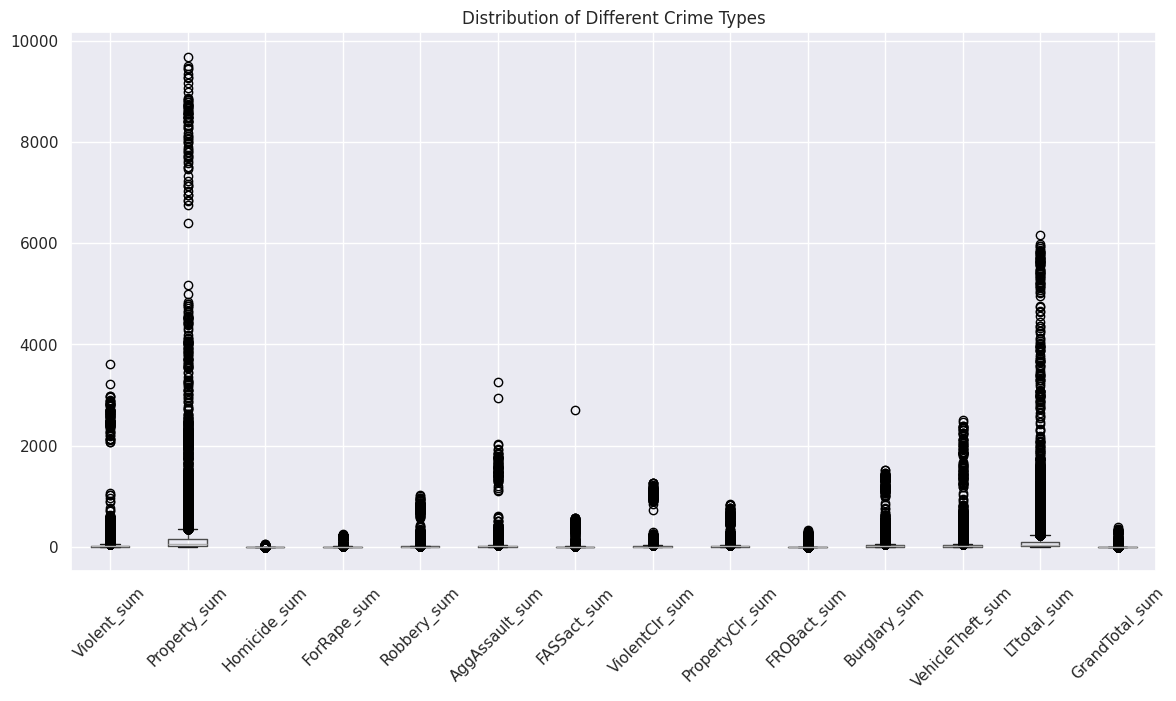

In [ ]:
# Boxplot

cleaned_final_df[['Violent_sum', 'Property_sum', 'Homicide_sum',
                  'ForRape_sum', 'Robbery_sum', 'AggAssault_sum', 'FASSact_sum', 'ViolentClr_sum',
                  'PropertyClr_sum', 'FROBact_sum',
                  'Burglary_sum', 'VehicleTheft_sum', 'LTtotal_sum', 'GrandTotal_sum']].boxplot()
plt.xticks(rotation=45)
plt.title('Distribution of Different Crime Types')
plt.show()


In [ ]:
# Summary stat

summary_stats = cleaned_final_df.describe()

summary_stats.head(10)

,Year,Month,Violent_sum,Property_sum,Homicide_sum,ForRape_sum,FROBact_sum,ViolentClr_sum,Robbery_sum,AggAssault_sum,Burglary_sum,FASSact_sum,PropertyClr_sum,VehicleTheft_sum,LTtotal_sum,GrandTotal_sum
count,25367.000000,25367.000000,25367.000000,25367.000000,25367.000000,25367.000000,25367.000000,25367.000000,25367.000000,25367.000000,25367.000000,25367.000000,25367.000000,25367.000000,25367.000000,25367.000000
mean,2019.999882,6.499783,33.407498,168.507589,0.351401,2.655852,2.693263,13.218315,9.983128,20.417117,26.079276,4.441992,13.928490,31.847361,110.580952,1.760713
std,1.999990,3.452016,161.452967,582.364734,1.855006,11.839314,15.168868,64.143641,50.319365,100.731382,86.533104,31.329694,40.388141,126.353645,380.776563,11.412574
min,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,3.500000,2.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000,2.000000,10.000000,0.000000
50%,2020.000000,6.000000,7.000000,50.000000,0.000000,1.000000,0.000000,3.000000,2.000000,5.000000,8.000000,0.000000,6.000000,7.000000,34.000000,0.000000
75%,2022.000000,9.000000,21.000000,149.000000,0.000000,2.000000,1.000000,10.000000,6.000000,13.000000,23.000000,2.000000,15.000000,23.000000,98.000000,1.000000
max,2023.000000,12.000000,3621.000000,9691.000000,48.000000,245.000000,322.000000,1267.000000,1027.000000,3265.000000,1513.000000,2696.000000,836.000000,2505.000000,6169.000000,389.000000


In [ ]:
# Latex code for summary stats

# Compute summary statistics with additional median values
summary_stats = cleaned_final_df.describe().T

# Calculate median only for numeric columns
numeric_cols = cleaned_final_df.select_dtypes(include=np.number).columns
summary_stats['median'] = cleaned_final_df[numeric_cols].median()

# Reorder columns for better presentation
summary_stats = summary_stats[['count', 'mean', 'median', 'std', 'min', 'max']]

# Round values to 2 decimal places
summary_stats = summary_stats.round(2)

# Convert to LaTeX format with 2 decimal places
latex_code = summary_stats.to_latex(index=True, column_format="|l|r|r|r|r|r|r|",
                                    float_format="%.2f",
                                    caption="Summary Statistics",
                                    label="tab:summary_stats")
# Print the LaTeX code
print(latex_code)

\begin{table}
\caption{Summary Statistics}
\label{tab:summary_stats}
\begin{tabular}{|l|r|r|r|r|r|r|}
\toprule
 & count & mean & median & std & min & max \\
\midrule
Year & 25367.00 & 2020.00 & 2020.00 & 2.00 & 2017.00 & 2023.00 \\
Month & 25367.00 & 6.50 & 6.00 & 3.45 & 1.00 & 12.00 \\
Violent_sum & 25367.00 & 33.41 & 7.00 & 161.45 & 0.00 & 3621.00 \\
Property_sum & 25367.00 & 168.51 & 50.00 & 582.36 & 0.00 & 9691.00 \\
Homicide_sum & 25367.00 & 0.35 & 0.00 & 1.86 & 0.00 & 48.00 \\
ForRape_sum & 25367.00 & 2.66 & 1.00 & 11.84 & 0.00 & 245.00 \\
FROBact_sum & 25367.00 & 2.69 & 0.00 & 15.17 & 0.00 & 322.00 \\
ViolentClr_sum & 25367.00 & 13.22 & 3.00 & 64.14 & 0.00 & 1267.00 \\
Robbery_sum & 25367.00 & 9.98 & 2.00 & 50.32 & 0.00 & 1027.00 \\
AggAssault_sum & 25367.00 & 20.42 & 5.00 & 100.73 & 0.00 & 3265.00 \\
Burglary_sum & 25367.00 & 26.08 & 8.00 & 86.53 & 0.00 & 1513.00 \\
FASSact_sum & 25367.00 & 4.44 & 0.00 & 31.33 & 0.00 & 2696.00 \\
PropertyClr_sum & 25367.00 & 13.93 & 6.00 & 40.3

In [ ]:
# Identify numeric columns excluding 'Year' and 'Month'
numeric_cols = cleaned_final_df.select_dtypes(include=np.number).columns
numeric_cols = numeric_cols.difference(['Year', 'Month'])

# Compute summary statistics for selected numeric columns
summary_stats = cleaned_final_df[numeric_cols].describe().T

# Calculate and add median values
summary_stats['median'] = cleaned_final_df[numeric_cols].median()

# Reorder columns for better presentation
summary_stats = summary_stats[['mean', 'median', 'std', 'min', 'max']]

# Round values to 2 decimal places
summary_stats = summary_stats.round(2)

# Convert to LaTeX format with 2 decimal places
latex_code = summary_stats.to_latex(index=True, column_format="|l|r|r|r|r|r|",
                                    float_format="%.2f",
                                    caption="Summary Statistics",
                                    label="tab:summary_stats")

# Print the LaTeX code
print(latex_code)

\begin{table}
\caption{Summary Statistics}
\label{tab:summary_stats}
\begin{tabular}{|l|r|r|r|r|r|}
\toprule
 & mean & median & std & min & max \\
\midrule
AggAssault_sum & 20.42 & 5.00 & 100.73 & 0.00 & 3265.00 \\
Burglary_sum & 26.08 & 8.00 & 86.53 & 0.00 & 1513.00 \\
FASSact_sum & 4.44 & 0.00 & 31.33 & 0.00 & 2696.00 \\
FROBact_sum & 2.69 & 0.00 & 15.17 & 0.00 & 322.00 \\
ForRape_sum & 2.66 & 1.00 & 11.84 & 0.00 & 245.00 \\
GrandTotal_sum & 1.76 & 0.00 & 11.41 & 0.00 & 389.00 \\
Homicide_sum & 0.35 & 0.00 & 1.86 & 0.00 & 48.00 \\
LTtotal_sum & 110.58 & 34.00 & 380.78 & 0.00 & 6169.00 \\
PropertyClr_sum & 13.93 & 6.00 & 40.39 & 0.00 & 836.00 \\
Property_sum & 168.51 & 50.00 & 582.36 & 0.00 & 9691.00 \\
Robbery_sum & 9.98 & 2.00 & 50.32 & 0.00 & 1027.00 \\
VehicleTheft_sum & 31.85 & 7.00 & 126.35 & 0.00 & 2505.00 \\
ViolentClr_sum & 13.22 & 3.00 & 64.14 & 0.00 & 1267.00 \\
Violent_sum & 33.41 & 7.00 & 161.45 & 0.00 & 3621.00 \\
\bottomrule
\end{tabular}
\end{table}



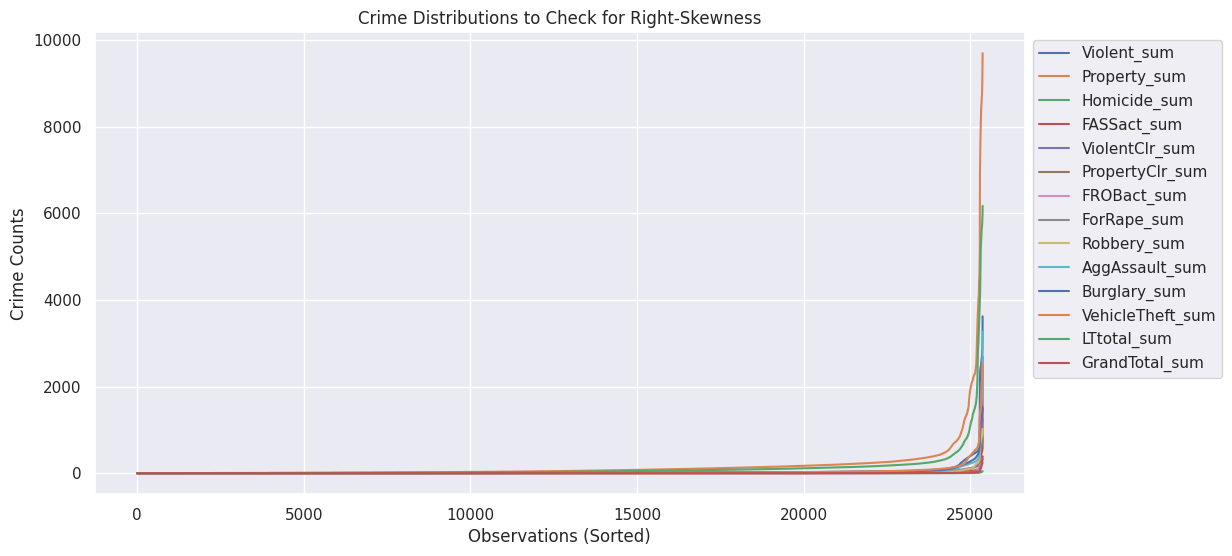

In [ ]:
# The data seems right-skewed- checking with a  sorted cumulative distribution plot of crime counts, which is useful for visually confirming right-skewness.


crime_vars = ['Violent_sum', 'Property_sum', 'Homicide_sum', 'FASSact_sum', 'ViolentClr_sum',
              'PropertyClr_sum', 'FROBact_sum',
              'ForRape_sum', 'Robbery_sum', 'AggAssault_sum',
              'Burglary_sum', 'VehicleTheft_sum', 'LTtotal_sum', 'GrandTotal_sum']

plt.figure(figsize=(12, 6))

for crime in crime_vars:
    sorted_values = sorted(cleaned_final_df[crime])  # Sort values to observe skewness
    plt.plot(sorted_values, label=crime)

plt.xlabel("Observations (Sorted)")
plt.ylabel("Crime Counts")
plt.title("Crime Distributions to Check for Right-Skewness")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()


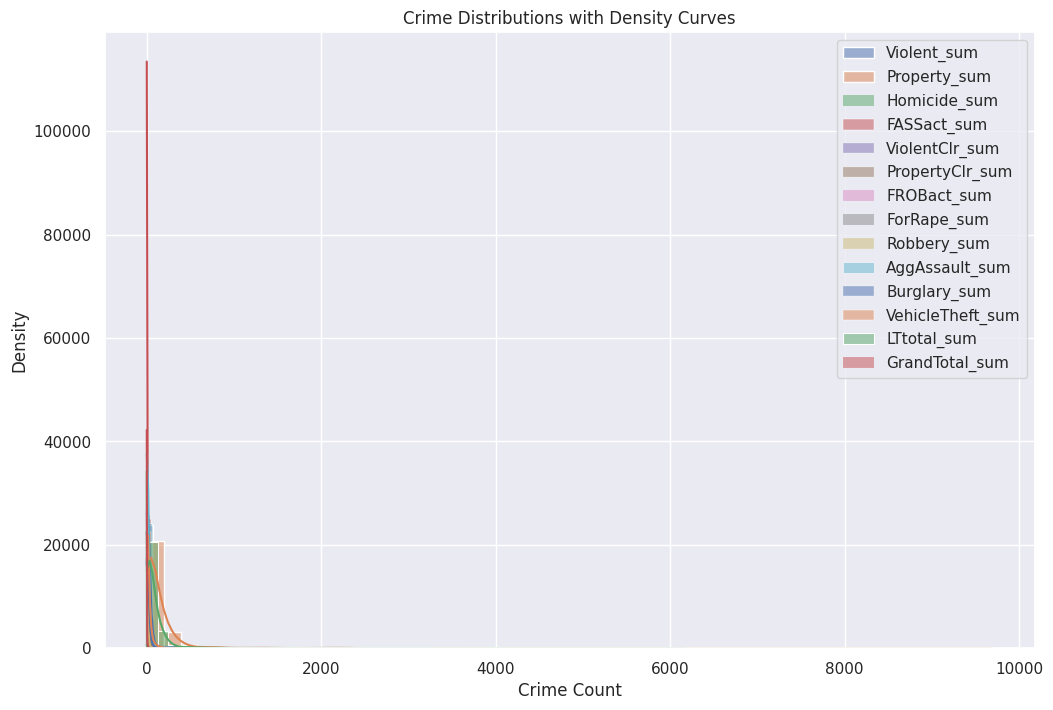

In [ ]:
# Checking for skewness

crime_vars = ['Violent_sum', 'Property_sum', 'Homicide_sum', 'FASSact_sum', 'ViolentClr_sum',
              'PropertyClr_sum', 'FROBact_sum',
              'ForRape_sum', 'Robbery_sum', 'AggAssault_sum',
              'Burglary_sum', 'VehicleTheft_sum', 'LTtotal_sum', 'GrandTotal_sum']

plt.figure(figsize=(12, 8))

for crime in crime_vars:
    sns.histplot(cleaned_final_df[crime], kde=True, bins=50, label=crime, alpha=0.5)

plt.xlabel("Crime Count")
plt.ylabel("Density")
plt.title("Crime Distributions with Density Curves")
plt.legend(loc="upper right")
plt.show()


In [ ]:
# cleaned_final_df is my clean ucr ca data with no missing values

### Stage 3: I want to add control data from census.gov to my cleaned_final_df (2017-2023)

In [ ]:
# Define file path
file_path = "/content/gdrive/MyDrive/CA_Psychedelic/cacontrolscities2.csv"

# Load the dataset
control_df = pd.read_csv(file_path)

# Display the first few rows
control_df.head()

,City,Year,Total Population,Male Population,Female Population,White Population,Black Population,Asian Population,Hispanic Population,Foreign-Born Population,...,Male - Gulf War (2001-present),Female - Gulf War (2001-present),Male - Gulf War (1990-2001),Female - Gulf War (1990-2001),Male - Vietnam War,Female - Vietnam War,Male - Korean War,Female - Korean War,Male - World War II,Female - World War II
0,Adelanto,2017,32867,16829,16038,20149,7075,503,20488,6577,...,72,62,0,0,224,75,0,211,322,28
1,Adelanto,2018,33416,17326,16090,20417,6862,417,21616,6615,...,73,44,0,0,205,56,0,181,259,34
2,Adelanto,2019,33660,18087,15573,21173,6377,568,22154,6685,...,71,27,0,0,200,14,0,211,184,25
3,Adelanto,2020,34238,18295,15943,18250,6258,481,23192,5953,...,205,43,0,0,243,0,0,216,167,27
4,Adelanto,2021,37229,19878,17351,16471,6424,543,25260,6358,...,211,50,0,0,190,0,0,217,208,27


In [ ]:
# Merge cleaned_final_df and control_df

# Rename 'Agency' to 'City' in cleaned_final_df
cleaned_final_df.rename(columns={'Agency': 'City'}, inplace=True)

# Merge the datasets on 'City' and 'Year'
merged_df = pd.merge(cleaned_final_df, control_df, on=['City', 'Year'], how='left')

# Display the first few rows to verify the merge
merged_df.head()


,County,City,Year,Month,Violent_sum,Property_sum,Homicide_sum,ForRape_sum,FROBact_sum,ViolentClr_sum,...,Male - Gulf War (2001-present),Female - Gulf War (2001-present),Male - Gulf War (1990-2001),Female - Gulf War (1990-2001),Male - Vietnam War,Female - Vietnam War,Male - Korean War,Female - Korean War,Male - World War II,Female - World War II
0,Alameda County,Albany,2017,1,3.0,42.0,0.0,0.0,0.0,1.0,...,9.0,31.0,0.0,0.0,21.0,22.0,9.0,34.0,195.0,20.0
1,Alameda County,Albany,2017,2,2.0,46.0,0.0,0.0,0.0,1.0,...,9.0,31.0,0.0,0.0,21.0,22.0,9.0,34.0,195.0,20.0
2,Alameda County,Albany,2017,3,2.0,34.0,0.0,0.0,0.0,1.0,...,9.0,31.0,0.0,0.0,21.0,22.0,9.0,34.0,195.0,20.0
3,Alameda County,Albany,2017,4,0.0,40.0,0.0,0.0,0.0,0.0,...,9.0,31.0,0.0,0.0,21.0,22.0,9.0,34.0,195.0,20.0
4,Alameda County,Albany,2017,5,7.0,52.0,0.0,0.0,3.0,3.0,...,9.0,31.0,0.0,0.0,21.0,22.0,9.0,34.0,195.0,20.0


In [ ]:
merged_df.columns

Index(['County', 'City', 'Year', 'Month', 'Violent_sum', 'Property_sum',
       'Homicide_sum', 'ForRape_sum', 'FROBact_sum', 'ViolentClr_sum',
       'Robbery_sum', 'AggAssault_sum', 'Burglary_sum', 'FASSact_sum',
       'PropertyClr_sum', 'VehicleTheft_sum', 'LTtotal_sum', 'GrandTotal_sum',
       'Total Population', 'Male Population', 'Female Population',
       'White Population', 'Black Population', 'Asian Population',
       'Hispanic Population', 'Foreign-Born Population', 'Veteran Population',
       'Total Marital Status', 'Married Population', 'Widowed Population',
       'Divorced Population', 'Separated Population',
       'Never-Married Population', 'Median Household Income',
       'Unemployed Population', 'Total Labor Force',
       'Population Below Poverty', 'Gini Index (Income Inequality)',
       'Households on Public Assistance', 'Median Home Value',
       'Homeowners Population', 'Renters Population',
       'Population with Health Insurance',
       'Population w

In [ ]:
# Creating Per Capita

# List of crime variables to convert to per capita rates
crime_vars = [
    'Violent_sum', 'Property_sum', 'Homicide_sum', 'ForRape_sum', 'FROBact_sum',
    'ViolentClr_sum', 'Robbery_sum', 'AggAssault_sum', 'Burglary_sum', 'FASSact_sum',
    'PropertyClr_sum', 'VehicleTheft_sum', 'LTtotal_sum', 'GrandTotal_sum'
]

# Create per capita crime variables
for var in crime_vars:
    per_capita_var = var.replace("_sum", "_per_100k")  # Rename for per capita version
    merged_df[per_capita_var] = (merged_df[var] / merged_df['Total Population']) * 100000

# Rename 'GrandTotal_per_100k' to 'Arson_per_100k'
merged_df.rename(columns={'GrandTotal_per_100k': 'Arson_per_100k'}, inplace=True)

# Display the first few rows to verify
merged_df.head()


,County,City,Year,Month,Violent_sum,Property_sum,Homicide_sum,ForRape_sum,FROBact_sum,ViolentClr_sum,...,FROBact_per_100k,ViolentClr_per_100k,Robbery_per_100k,AggAssault_per_100k,Burglary_per_100k,FASSact_per_100k,PropertyClr_per_100k,VehicleTheft_per_100k,LTtotal_per_100k,Arson_per_100k
0,Alameda County,Albany,2017,1,3.0,42.0,0.0,0.0,0.0,1.0,...,0.000000,5.080784,15.242353,0.000000,30.484707,0.0,25.403922,40.646276,142.261965,0.0
1,Alameda County,Albany,2017,2,2.0,46.0,0.0,0.0,0.0,1.0,...,0.000000,5.080784,10.161569,0.000000,25.403922,0.0,45.727060,10.161569,198.150594,0.0
2,Alameda County,Albany,2017,3,2.0,34.0,0.0,0.0,0.0,1.0,...,0.000000,5.080784,0.000000,10.161569,20.323138,0.0,50.807845,25.403922,127.019612,0.0
3,Alameda County,Albany,2017,4,0.0,40.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,30.484707,0.0,55.888629,20.323138,152.423534,0.0
4,Alameda County,Albany,2017,5,7.0,52.0,0.0,0.0,3.0,3.0,...,15.242353,15.242353,35.565491,0.000000,60.969414,0.0,55.888629,40.646276,162.585103,0.0


In [ ]:
# Verifying dataset for missing and negative values

# Check for missing values in merged_df
missing_values = merged_df.isnull().sum()

# Check for negative values in merged_df (only for numerical columns)
negative_values = (merged_df.select_dtypes(include=[np.number]) < 0).sum()

# Create DataFrames to display results
missing_values_df = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values})
negative_values_df = pd.DataFrame({'Column': negative_values.index, 'Negative Values': negative_values.values})

# Display results
print("Missing Values:")
print(missing_values_df)

print("\nNegative Values:")
print(negative_values_df)


Missing Values:
                    Column  Missing Values
0                   County               0
1                     City               0
2                     Year               0
3                    Month               0
4              Violent_sum               0
..                     ...             ...
99        FASSact_per_100k             924
100   PropertyClr_per_100k             924
101  VehicleTheft_per_100k             924
102       LTtotal_per_100k             924
103         Arson_per_100k             924

[104 rows x 2 columns]

Negative Values:
                    Column  Negative Values
0                     Year                0
1                    Month                0
2              Violent_sum                0
3             Property_sum                0
4             Homicide_sum                0
..                     ...              ...
97        FASSact_per_100k                0
98    PropertyClr_per_100k                0
99   VehicleTheft_per_100k    

In [ ]:
# List of columns with missing values (from your missing_values_df)
cols_with_missing = missing_values_df.loc[missing_values_df['Missing Values'] > 0, 'Column'].tolist()

# Group by 'City' and count missing values across the selected columns
missing_by_city = merged_df.groupby('City')[cols_with_missing].apply(lambda df: df.isnull().sum().sum()).reset_index(name='Total Missing Values')

# Display the cities with their corresponding total missing values
print(missing_by_city)


                City  Total Missing Values
0             Albany                     0
1           Alhambra                     0
2    American Canyon                     0
3            Anaheim                     0
4        Angels Camp                  7224
..               ...                   ...
297          Windsor                     0
298          Winters                     0
299         Woodlake                     0
300         Woodland                     0
301      Yorba Linda                     0

[302 rows x 2 columns]


In [ ]:
# Recalculate missing values by city
cols_with_missing = missing_values_df.loc[missing_values_df['Missing Values'] > 0, 'Column'].tolist()
missing_by_city = merged_df.groupby('City')[cols_with_missing].apply(lambda df: df.isnull().sum().sum()).reset_index(name='Total Missing Values')

# Get cities with missing values
cities_with_missing = missing_by_city[missing_by_city['Total Missing Values'] > 0]['City'].tolist()

# Recalculate negative values by city
cols_with_negative = negative_values_df.loc[negative_values_df['Negative Values'] > 0, 'Column'].tolist()
negative_by_city = merged_df.groupby('City')[cols_with_negative].apply(lambda df: (df < 0).sum().sum()).reset_index(name='Total Negative Values')

# Get cities with negative values
cities_with_negative = negative_by_city[negative_by_city['Total Negative Values'] > 0]['City'].tolist()

# Combine cities with either missing or negative values
cities_with_issues = list(set(cities_with_missing + cities_with_negative))

# Display the list of cities with issues
print(cities_with_issues)


['Angels Camp', 'Kensington', 'Northridge', 'Central Marin', 'Paso Robles', 'Vernon', 'Bear Valley', 'Carmel', 'Suisun', 'Broadmoor', 'Sand City', 'Ventura', 'Buelton']


In [ ]:
# List of cities to drop
cities_to_drop = ['Broadmoor', 'Northridge', 'Carmel', 'Ventura', 'Angels Camp', 'Vernon',
                  'Bear Valley', 'Central Marin', 'Buelton', 'Suisun', 'Sand City',
                  'Paso Robles', 'Kensington']

# Drop rows where 'City' is in the list of cities to remove
merged_df = merged_df[~merged_df['City'].isin(cities_to_drop)]

In [ ]:
# Check again


# Check for missing values in merged_df
missing_values = merged_df.isnull().sum()

# Check for negative values in merged_df (only for numerical columns)
negative_values = (merged_df.select_dtypes(include=[np.number]) < 0).sum()

# Create DataFrames to display results
missing_values_df = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values})
negative_values_df = pd.DataFrame({'Column': negative_values.index, 'Negative Values': negative_values.values})

# Display results
print("Missing Values:")
print(missing_values_df)

print("\nNegative Values:")
print(negative_values_df)

Missing Values:
                    Column  Missing Values
0                   County               0
1                     City               0
2                     Year               0
3                    Month               0
4              Violent_sum               0
..                     ...             ...
99        FASSact_per_100k               0
100   PropertyClr_per_100k               0
101  VehicleTheft_per_100k               0
102       LTtotal_per_100k               0
103         Arson_per_100k               0

[104 rows x 2 columns]

Negative Values:
                    Column  Negative Values
0                     Year                0
1                    Month                0
2              Violent_sum                0
3             Property_sum                0
4             Homicide_sum                0
..                     ...              ...
97        FASSact_per_100k                0
98    PropertyClr_per_100k                0
99   VehicleTheft_per_100k    

In [ ]:
# Treatment Cohort

# List of treated cities with their treatment dates
treated_cities = {
    "Oakland": "2019-6",
    "Santa Cruz": "2020-1",
    "Arcata": "2021-10",
    "San Francisco": "2022-9",
    "Berkeley": "2023-7",
    "Eureka": "2023-10"
}

# Function to count occurrences of treated cities in a dataset
def count_city_occurrences(df, city_column="City"):
    # Use 'Agency' for df and cleaned_final_df, 'City' for merged_df
    # Adjusting to use 'City' column if 'Agency' is not present
    column_name = city_column if city_column in df.columns else "City" if "City" in df.columns else "Agency"

    city_counts = {city: df[df[column_name] == city][column_name].nunique() for city in treated_cities.keys()}
    never_treated_count = df[~df[column_name].isin(treated_cities.keys())][column_name].nunique()
    city_counts["Never Treated"] = never_treated_count
    return city_counts

# Count occurrences in each dataset
df_counts = count_city_occurrences(df, city_column="Agency") # Specify city_column for df
cleaned_final_df_counts = count_city_occurrences(cleaned_final_df, city_column="City") # Specify city_column for cleaned_final_df
merged_df_counts = count_city_occurrences(merged_df, city_column="City") # Specify city_column for merged_df

# Create DataFrames for display
df_counts_df = pd.DataFrame(list(df_counts.items()), columns=["City", "Count in df"])
cleaned_final_df_counts_df = pd.DataFrame(list(cleaned_final_df_counts.items()), columns=["City", "Count in cleaned_final_df"])
merged_df_counts_df = pd.DataFrame(list(merged_df_counts.items()), columns=["City", "Count in merged_df"])

# Merge results for better comparison
city_counts_combined = df_counts_df.merge(cleaned_final_df_counts_df, on="City").merge(merged_df_counts_df, on="City")

# Display the final table
# Generate LaTeX table from the city counts DataFrame
# Make sure pandas is imported
import pandas as pd
latex_table = city_counts_combined.to_latex(index=False, caption="City Counts Across Datasets", label="tab:city_counts")

# Display the LaTeX table output
print(latex_table)

\begin{table}
\caption{City Counts Across Datasets}
\label{tab:city_counts}
\begin{tabular}{lrrr}
\toprule
City & Count in df & Count in cleaned_final_df & Count in merged_df \\
\midrule
Oakland & 1 & 1 & 1 \\
Santa Cruz & 1 & 1 & 1 \\
Arcata & 1 & 1 & 1 \\
San Francisco & 1 & 1 & 1 \\
Berkeley & 1 & 1 & 1 \\
Eureka & 1 & 0 & 0 \\
Never Treated & 888 & 297 & 284 \\
\bottomrule
\end{tabular}
\end{table}



In [ ]:
# Save Final clean data with controls

# Define the file path
file_path = "/content/gdrive/MyDrive/CA_Psychedelic/chapter1final.csv"

# Save merged_df to CSV
merged_df.to_csv(file_path, index=False)

# Confirm the file has been saved
file_path


'/content/gdrive/MyDrive/CA_Psychedelic/chapter1final.csv'

In [ ]:
# Check for San Jose

# Filter merged_df for San Jose in the year 2023
san_jose_2023 = merged_df[(merged_df["City"] == "San Jose") & (merged_df["Year"] == 2023)]

# Display the first 12 rows to examine crime data from Jan to Dec
san_jose_2023.head(15)

,County,City,Year,Month,Violent_sum,Property_sum,Homicide_sum,ForRape_sum,FROBact_sum,ViolentClr_sum,...,FROBact_per_100k,ViolentClr_per_100k,Robbery_per_100k,AggAssault_per_100k,Burglary_per_100k,FASSact_per_100k,PropertyClr_per_100k,VehicleTheft_per_100k,LTtotal_per_100k,Arson_per_100k
20904,Santa Clara County,San Jose,2023,1,423.0,2079.0,3.0,81.0,29.0,178.0,...,2.929133,17.978817,11.514523,22.726033,31.715442,4.747216,16.867767,59.289695,118.983409,1.919087
20905,Santa Clara County,San Jose,2023,2,353.0,1827.0,2.0,64.0,15.0,111.0,...,1.515069,11.211510,9.797445,19.190872,25.554162,4.545207,13.534615,63.834902,95.146325,0.909041
20906,Santa Clara County,San Jose,2023,3,449.0,1815.0,3.0,78.0,20.0,165.0,...,2.020092,16.665758,11.312514,25.857175,32.422474,4.040184,14.847675,62.420838,88.480022,2.929133
20907,Santa Clara County,San Jose,2023,4,446.0,1745.0,4.0,51.0,13.0,139.0,...,1.313060,14.039638,8.080367,31.412428,28.584299,3.434156,11.716533,49.593255,98.075459,1.515069
20908,Santa Clara County,San Jose,2023,5,516.0,2001.0,1.0,60.0,14.0,158.0,...,1.414064,15.958725,9.999455,35.957635,33.836538,3.131142,12.726579,54.542480,113.731170,1.414064
20909,Santa Clara County,San Jose,2023,6,500.0,2200.0,8.0,47.0,14.0,162.0,...,1.414064,16.362744,12.625574,32.321469,31.816446,5.555253,15.554707,67.875086,122.518570,1.717078
20910,Santa Clara County,San Jose,2023,7,570.0,2089.0,2.0,43.0,14.0,207.0,...,1.414064,20.907950,11.615528,41.411883,27.574254,6.565298,13.433611,73.026320,110.398019,2.222101
20911,Santa Clara County,San Jose,2023,8,524.0,1992.0,3.0,60.0,11.0,185.0,...,1.111051,18.685849,9.393427,37.169690,31.412428,4.848220,13.332606,63.834902,105.953817,0.909041
20912,Santa Clara County,San Jose,2023,9,583.0,1847.0,2.0,51.0,17.0,206.0,...,1.717078,20.806946,10.908496,42.623938,32.119460,4.545207,14.241647,49.896268,104.539752,1.313060
20913,Santa Clara County,San Jose,2023,10,526.0,1927.0,1.0,35.0,20.0,193.0,...,2.020092,19.493886,11.110505,38.381745,26.362198,3.939179,13.332606,59.491704,108.781945,1.717078


In [ ]:
# Loading data
my_data = "/content/gdrive/MyDrive/CA_Psychedelic/chapter1final.csv"
merged_df = pd.read_csv(my_data)
merged_df.head()

,County,City,Year,Month,Violent_sum,Property_sum,Homicide_sum,ForRape_sum,FROBact_sum,ViolentClr_sum,...,FROBact_per_100k,ViolentClr_per_100k,Robbery_per_100k,AggAssault_per_100k,Burglary_per_100k,FASSact_per_100k,PropertyClr_per_100k,VehicleTheft_per_100k,LTtotal_per_100k,Arson_per_100k
0,Alameda County,Albany,2017,1,3.0,42.0,0.0,0.0,0.0,1.0,...,0.000000,5.080784,15.242353,0.000000,30.484707,0.0,25.403922,40.646276,142.261965,0.0
1,Alameda County,Albany,2017,2,2.0,46.0,0.0,0.0,0.0,1.0,...,0.000000,5.080784,10.161569,0.000000,25.403922,0.0,45.727060,10.161569,198.150594,0.0
2,Alameda County,Albany,2017,3,2.0,34.0,0.0,0.0,0.0,1.0,...,0.000000,5.080784,0.000000,10.161569,20.323138,0.0,50.807845,25.403922,127.019612,0.0
3,Alameda County,Albany,2017,4,0.0,40.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,30.484707,0.0,55.888629,20.323138,152.423534,0.0
4,Alameda County,Albany,2017,5,7.0,52.0,0.0,0.0,3.0,3.0,...,15.242353,15.242353,35.565491,0.000000,60.969414,0.0,55.888629,40.646276,162.585103,0.0


In [ ]:
# Log Transformation

# Create a copy of merged_df and call it merged_crime_df
merged_crime_df = merged_df.copy()

# Identify numeric columns but exclude 'Year' and 'Month'
numeric_cols = merged_crime_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['Year', 'Month']]

# Apply log transformation (adding 1 to avoid log(0) issues) while keeping original column names
for col in numeric_cols:
    merged_crime_df[col] = np.log1p(merged_crime_df[col])

# Display the first few rows with log-transformed columns
merged_crime_df.head()

,County,City,Year,Month,Violent_sum,Property_sum,Homicide_sum,ForRape_sum,FROBact_sum,ViolentClr_sum,...,FROBact_per_100k,ViolentClr_per_100k,Robbery_per_100k,AggAssault_per_100k,Burglary_per_100k,FASSact_per_100k,PropertyClr_per_100k,VehicleTheft_per_100k,LTtotal_per_100k,Arson_per_100k
0,Alameda County,Albany,2017,1,1.386294,3.761200,0.0,0.0,0.000000,0.693147,...,0.000000,1.805134,2.787622,0.000000,3.449502,0.0,3.273513,3.729212,4.964675,0.0
1,Alameda County,Albany,2017,2,1.098612,3.850148,0.0,0.0,0.000000,0.693147,...,0.000000,1.805134,2.412477,0.000000,3.273513,0.0,3.844323,2.412477,5.294061,0.0
2,Alameda County,Albany,2017,3,1.098612,3.555348,0.0,0.0,0.000000,0.693147,...,0.000000,1.805134,0.000000,2.412477,3.059793,0.0,3.947542,3.273513,4.852183,0.0
3,Alameda County,Albany,2017,4,0.000000,3.713572,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.449502,0.0,4.041095,3.059793,5.033202,0.0
4,Alameda County,Albany,2017,5,2.079442,3.970292,0.0,0.0,1.386294,1.386294,...,2.787622,2.787622,3.599105,0.000000,4.126641,0.0,4.041095,3.729212,5.097333,0.0


In [ ]:
# Check summary statistics of numeric columns to confirm log transformation
log_transformation_check = merged_crime_df.describe()
log_transformation_check

,Year,Month,Violent_sum,Property_sum,Homicide_sum,ForRape_sum,FROBact_sum,ViolentClr_sum,Robbery_sum,AggAssault_sum,...,FROBact_per_100k,ViolentClr_per_100k,Robbery_per_100k,AggAssault_per_100k,Burglary_per_100k,FASSact_per_100k,PropertyClr_per_100k,VehicleTheft_per_100k,LTtotal_per_100k,Arson_per_100k
count,24275.000000,24275.000000,24275.000000,24275.000000,24275.000000,24275.000000,24275.000000,24275.000000,24275.000000,24275.000000,...,24275.000000,24275.000000,24275.000000,24275.000000,24275.000000,24275.000000,24275.000000,24275.000000,24275.000000,24275.000000
mean,2019.999876,6.499773,2.227359,3.943781,0.146450,0.682466,0.539082,1.609286,1.216479,1.839548,...,0.590959,2.155757,1.509030,2.464523,3.063306,0.741156,2.542622,2.822111,4.530274,0.557149
std,1.999990,3.452014,1.417456,1.504312,0.415324,0.856241,0.861207,1.231101,1.222823,1.332742,...,0.828606,1.261081,1.208041,1.309318,1.153490,1.024087,1.287578,1.335476,0.949194,0.846435
min,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,3.500000,1.098612,2.833213,0.000000,0.000000,0.000000,0.693147,0.000000,0.693147,...,0.000000,1.533011,0.000000,1.899402,2.718328,0.000000,2.104559,2.358737,4.196202,0.000000
50%,2020.000000,6.000000,2.197225,3.988984,0.000000,0.693147,0.000000,1.609438,1.098612,1.791759,...,0.000000,2.472245,1.769668,2.772682,3.289917,0.000000,2.794539,3.154129,4.667405,0.000000
75%,2022.000000,9.000000,3.135494,5.036953,0.000000,1.098612,0.693147,2.397895,1.945910,2.708050,...,1.195138,3.041708,2.454471,3.360989,3.735214,1.490080,3.325439,3.716979,5.032812,1.061226
max,2023.000000,12.000000,8.194782,9.179056,3.891820,5.505332,5.777652,7.145196,6.935370,8.091321,...,4.839698,6.097595,6.135196,6.824502,7.599923,6.824502,8.191354,6.391383,8.772587,5.264283


In [ ]:
# Define the file path
file_path = "/content/gdrive/MyDrive/CA_Psychedelic/chapter1log.csv"

# Save merged_df to CSV
merged_crime_df.to_csv(file_path, index=False)

# Confirm the file has been saved
file_path


'/content/gdrive/MyDrive/CA_Psychedelic/chapter1log.csv'

In [ ]:
# List all crime-related variables in merged_crime_df
crime_variables = merged_crime_df.columns.tolist()

# Display the crime variables
crime_variables


['County',
 'City',
 'Year',
 'Month',
 'Violent_sum',
 'Property_sum',
 'Homicide_sum',
 'ForRape_sum',
 'FROBact_sum',
 'ViolentClr_sum',
 'Robbery_sum',
 'AggAssault_sum',
 'Burglary_sum',
 'FASSact_sum',
 'PropertyClr_sum',
 'VehicleTheft_sum',
 'LTtotal_sum',
 'GrandTotal_sum',
 'Total Population',
 'Male Population',
 'Female Population',
 'White Population',
 'Black Population',
 'Asian Population',
 'Hispanic Population',
 'Foreign-Born Population',
 'Veteran Population',
 'Total Marital Status',
 'Married Population',
 'Widowed Population',
 'Divorced Population',
 'Separated Population',
 'Never-Married Population',
 'Median Household Income',
 'Unemployed Population',
 'Total Labor Force',
 'Population Below Poverty',
 'Gini Index (Income Inequality)',
 'Households on Public Assistance',
 'Median Home Value',
 'Homeowners Population',
 'Renters Population',
 'Population with Health Insurance',
 'Population without Health Insurance',
 'Law Enforcement Workers',
 'Firefighters

In [ ]:
# Define columns to drop from merged_crime_df
columns_to_drop = [
    "Violent_sum", "Property_sum", "Homicide_sum", "ForRape_sum", "Robbery_sum", "AggAssault_sum",
    "Burglary_sum", "VehicleTheft_sum", "LTtotal_sum", "GrandTotal_sum", "ViolentClr_sum",
    "PropertyClr_sum", "FROBact_sum", "FASSact_sum", "state", "place"
]

# Drop specified columns
merged_crime_df = merged_crime_df.drop(columns=columns_to_drop, errors='ignore')

# Display the updated dataframe info to confirm removal
merged_crime_df.info()
 # no NAN in merged_crime_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24275 entries, 0 to 24274
Data columns (total 89 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   County                                             24275 non-null  object 
 1   City                                               24275 non-null  object 
 2   Year                                               24275 non-null  int64  
 3   Month                                              24275 non-null  int64  
 4   LTtotal_sum                                        24275 non-null  float64
 5   Total Population                                   24275 non-null  float64
 6   Male Population                                    24275 non-null  float64
 7   Female Population                                  24275 non-null  float64
 8   White Population                                   24275 non-null  float64
 9   Black 

In [ ]:
# Check for missing and negatives in log data

# Check for missing values in merged_crime_df
missing_values = merged_crime_df.isnull().sum()

# Check for negative values in merged_crime_df (only for numerical columns)
negative_values = (merged_crime_df.select_dtypes(include=[np.number]) < 0).sum()

# Create DataFrames to display results
missing_values_df = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values})
negative_values_df = pd.DataFrame({'Column': negative_values.index, 'Negative Values': negative_values.values})

# Display results
print("Missing Values:")
print(missing_values_df)

print("\nNegative Values:")
print(negative_values_df)

Missing Values:
                   Column  Missing Values
0                  County               0
1                    City               0
2                    Year               0
3                   Month               0
4             LTtotal_sum               0
..                    ...             ...
84       FASSact_per_100k               0
85   PropertyClr_per_100k               0
86  VehicleTheft_per_100k               0
87       LTtotal_per_100k               0
88         Arson_per_100k               0

[89 rows x 2 columns]

Negative Values:
                   Column  Negative Values
0                    Year                0
1                   Month                0
2             LTtotal_sum                0
3        Total Population                0
4         Male Population                0
..                    ...              ...
82       FASSact_per_100k                0
83   PropertyClr_per_100k                0
84  VehicleTheft_per_100k                0
85       

In [ ]:
# Check for missing values in merged_crime_df
missing_values = merged_crime_df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filter only columns with missing values

# Check for negative values in merged_crime_df (only for numerical columns)
negative_values = (merged_crime_df.select_dtypes(include=[np.number]) < 0).sum()
negative_values = negative_values[negative_values > 0]  # Filter only columns with negative values

# Convert to lists
missing_values_list = missing_values.index.tolist()
negative_values_list = negative_values.index.tolist()

# Display the lists
missing_values_list, negative_values_list


([], [])

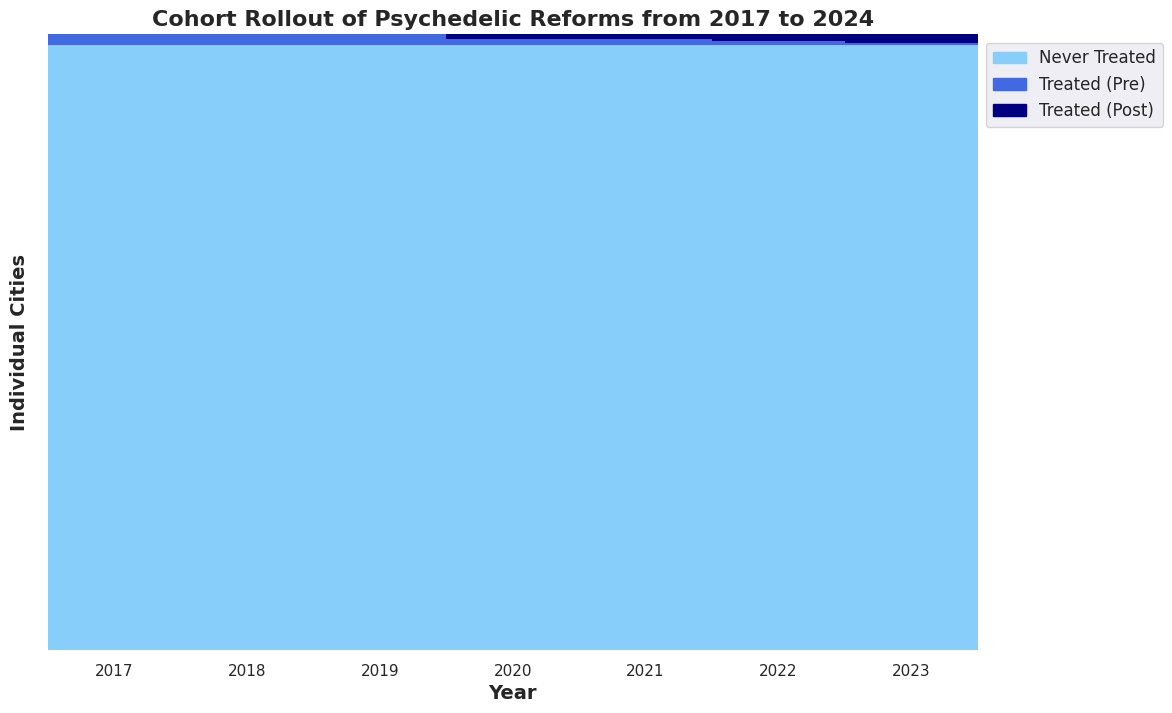

In [ ]:
# Step 3- Treatment rollout map

import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

# Define treatment dates for each treated city
treatment_dates = {
    "Oakland": "2019-06",
    "Santa Cruz": "2020-01",
    "Arcata": "2021-10",
    "San Francisco": "2022-09",
    "Berkeley": "2023-07"
}


# Convert treatment dates to datetime format
treatment_dates = {city: pd.to_datetime(date) for city, date in treatment_dates.items()}

# Extract unique years (extend timeline for better visualization)
years = np.arange(2017, 2024)
cities = merged_crime_df["City"].unique()

# Ensure treated cities are **at the top** for stacking
sorted_cities = list(treatment_dates.keys()) + sorted(set(cities) - set(treatment_dates.keys()))

# Create dataframe for visualization
plot_data = []
for city in sorted_cities:
    for year in years:
        date = pd.Timestamp(f"{year}-01-01")
        if city in treatment_dates:
            if date < treatment_dates[city]:
                status = 1  # "Treated (Pre)"
            else:
                status = 2  # "Treated (Post)"
        else:
            status = 0  # "Never Treated"
        plot_data.append({"City": city, "Year": year, "Status": status})

plot_df = pd.DataFrame(plot_data)

# Convert treatment status to numerical
plot_df["Status_Num"] = plot_df["Status"]  # Ensures the column is already numeric

# Pivot table for heatmap (ensure correct sorting)
heatmap_data = plot_df.pivot(index="City", columns="Year", values="Status_Num").loc[sorted_cities]

# **Fix 1: Ensure there are no NaN values**
heatmap_data = heatmap_data.fillna(0)

# **Fix 2: Use `ListedColormap` instead of a list of colors**
cmap = ListedColormap(["lightskyblue", "royalblue", "navy"])

# Create figure
plt.figure(figsize=(12, 8))

# **Fix 3: Use `vmin` and `vmax` to ensure correct color mapping**
ax = sns.heatmap(
    heatmap_data,
    cmap=cmap,
    linewidths=0,  # **Removes gridlines**
    cbar=False,
    vmin=0, vmax=2  # Ensures proper mapping of 0,1,2 to colors
)

# Formatting the plot
plt.xlabel("Year", fontsize=14, fontweight="bold")
plt.ylabel("Individual Cities", fontsize=14, fontweight="bold")
plt.title("Cohort Rollout of Psychedelic Reforms from 2017 to 2024", fontsize=16, fontweight="bold")

# **Remove y-axis labels for cleaner stacking**
ax.set_yticklabels([])

# **Fix 4: Use `ListedColormap` colors in the legend**
legend_patches = [
    mpatches.Patch(color="lightskyblue", label="Never Treated"),
    mpatches.Patch(color="royalblue", label="Treated (Pre)"),
    mpatches.Patch(color="navy", label="Treated (Post)")
]
plt.legend(handles=legend_patches, loc="upper left", bbox_to_anchor=(1, 1), fontsize=12)

# Show the plot
plt.show()

In [ ]:
# Step 4- LASSO - last try, worked
#!pip install scikit-learn # Install scikit-learn if you haven't already

# Ensure Date column is in datetime format
import pandas as pd # Import pandas for data manipulation
import numpy as np # Import numpy for numerical operations
from sklearn.preprocessing import StandardScaler # Import the StandardScaler class
from sklearn.linear_model import LogisticRegression # Import LogisticRegression for LASSO


# Ensure Date column is in datetime format
merged_crime_df["Date"] = pd.to_datetime(merged_crime_df["Year"].astype(str) + "-" + merged_crime_df["Month"].astype(str))

# Step 1: Filter data for pre-treatment period (before June 2019)
pre_treatment_data = merged_crime_df[merged_crime_df["Date"] < "2019-06-01"].copy()

# Step 2: Define treated cities
treated_cities_list = ["Oakland", "Santa Cruz", "Arcata", "San Francisco", "Berkeley"]
pre_treatment_data["Treated"] = pre_treatment_data["City"].apply(lambda x: 1 if x in treated_cities_list else 0)

# Step 3: Define covariates (excluding identifiers, outcome variables, and treatment variable)
excluded_columns = ["City", "Year", "Month", "Date", "Violent_per_100k", "Property_per_100k", "Treated", "County"]
covariate_columns = pre_treatment_data.columns.difference(excluded_columns)

# Step 4: Remove near-zero variance features (to improve LASSO speed)
X = pre_treatment_data[covariate_columns]
low_variance_cols = X.std() < 1e-3  # Threshold to drop near-zero variance columns
X = X.loc[:, ~low_variance_cols]

# Step 5: Standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Run optimized LASSO logistic regression (without CV for speed)
lasso_logit = LogisticRegression(
    penalty="l1",
    solver="saga",  # Optimized for large data & sparse solutions
    C=0.1,  # Adjusted regularization strength (avoiding CV for speed)
    max_iter=2000,  # Reducing max iterations
    tol=1e-3,  # Speeding up convergence
    random_state=42
)
lasso_logit.fit(X_scaled, pre_treatment_data["Treated"])

# Step 7: Identify important predictors (nonzero coefficients)
selected_features_lasso = np.array(X.columns)[np.abs(lasso_logit.coef_).flatten() > 0]

# Save selected LASSO features for later use
selected_features_lasso_df = pd.DataFrame({"Selected Features": selected_features_lasso})

# Display the selected features - 16 selected
selected_features_lasso_df
selected_features_lasso


array(['Arson_per_100k', 'FROBact_per_100k',
       'Female - Gulf War (2001-present)', 'Female Veterans',
       'ForRape_per_100k', 'Foreign-Born Population',
       'Gini Index (Income Inequality)', 'Homicide_per_100k',
       'LTtotal_per_100k', 'Male - Gulf War (1990-2001)',
       'Male - Gulf War (2001-present)', 'Male - World War II',
       'Median Home Value', 'Population Density', 'VehicleTheft_per_100k',
       'Young Adults (18-24 years) Female'], dtype=object)

In [ ]:
# Step 6- ND- Oakland

# Define function to calculate normalized differences for a specific treated city
def compute_normalized_difference(treated_city, treatment_date):
    """
    Compute normalized differences for a given treated city using pre-treatment data.
    Control group includes all never-treated cities and cities not yet treated at that time.
    """
    # Convert treatment date to datetime
    treatment_date = pd.to_datetime(treatment_date)

    # Filter pre-treatment data for the treated city
    treated_df = merged_crime_df[
        (merged_crime_df["City"] == treated_city) & (merged_crime_df["Date"] < treatment_date)
    ]

    # Define the control group: cities that were never treated or had not yet been treated
    control_df = merged_crime_df[
        (~merged_crime_df["City"].isin(["Oakland", "Santa Cruz", "Arcata", "San Francisco", "Berkeley"])) |
        (merged_crime_df["Date"] < treatment_date)
    ]

    # Keep only LASSO-selected covariates
    treated_df = treated_df[selected_features_lasso]
    control_df = control_df[selected_features_lasso]

    # Compute means and standard deviations
    mean_treated = treated_df.mean()
    mean_control = control_df.mean()
    std_treated = treated_df.std()
    std_control = control_df.std()

    # Compute normalized difference
    normalized_diff = (mean_treated - mean_control) / np.sqrt((std_treated**2 + std_control**2) / 2)

    # Create a results DataFrame
    results_df = pd.DataFrame({
        "Variable": selected_features_lasso,
        "Treated Mean": mean_treated.values,
        "Control Mean": mean_control.values,
        "Normalized Difference": normalized_diff.values
    })

    return results_df

# Compute normalized difference for Oakland (treated June 2019)
oakland_results = compute_normalized_difference("Oakland", "2019-06-01")

# Convert results to LaTeX table format
latex_table = oakland_results.to_latex(index=False, float_format="%.3f")

# Display the table as a downloadable file


# Output LaTeX table
latex_table


'\\begin{tabular}{lrrr}\n\\toprule\nVariable & Treated Mean & Control Mean & Normalized Difference \\\\\n\\midrule\nArson_per_100k & 1.596 & 0.546 & 1.640 \\\\\nFROBact_per_100k & 3.119 & 0.580 & 4.276 \\\\\nFemale - Gulf War (2001-present) & 6.791 & 4.172 & 2.067 \\\\\nFemale Veterans & 1.379 & 0.514 & 0.604 \\\\\nForRape_per_100k & 2.199 & 0.836 & 2.023 \\\\\nForeign-Born Population & 11.656 & 8.854 & 2.525 \\\\\nGini Index (Income Inequality) & 0.413 & 0.364 & 2.271 \\\\\nHomicide_per_100k & 0.860 & 0.130 & 2.356 \\\\\nLTtotal_per_100k & 5.805 & 4.518 & 1.908 \\\\\nMale - Gulf War (1990-2001) & 2.616 & 0.680 & 1.951 \\\\\nMale - Gulf War (2001-present) & 5.898 & 3.489 & 1.658 \\\\\nMale - World War II & 8.416 & 5.888 & 2.552 \\\\\nMedian Home Value & 13.322 & 13.117 & 0.438 \\\\\nPopulation Density & 1.025 & 1.129 & -1.315 \\\\\nVehicleTheft_per_100k & 4.647 & 2.808 & 1.939 \\\\\nYoung Adults (18-24 years) Female & 9.116 & 6.530 & 2.300 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
# All treated cities together

# List of treated cities and treatment cutoff
treated_cities = ["Oakland", "Santa Cruz", "Arcata", "San Francisco", "Berkeley"]
treatment_cutoff_date = pd.to_datetime("2019-06-01")

# Function to compute normalized differences for pooled treated cities
def compute_pooled_normalized_difference(treated_cities, cutoff_date):
    """
    Compute normalized differences for all treated cities pooled together (pre-treatment only),
    compared to the never-treated control cities (also pre-treatment).
    """
    # Pre-treatment data for treated group
    treated_df = merged_crime_df[
        (merged_crime_df["City"].isin(treated_cities)) &
        (merged_crime_df["Date"] < cutoff_date)
    ]

    # Control group: never-treated cities only
    control_df = merged_crime_df[
        (~merged_crime_df["City"].isin(treated_cities)) &
        (merged_crime_df["Date"] < cutoff_date)
    ]

    # Keep only LASSO-selected covariates
    treated_df = treated_df[selected_features_lasso]
    control_df = control_df[selected_features_lasso]

    # Compute means and standard deviations
    mean_treated = treated_df.mean()
    mean_control = control_df.mean()
    std_treated = treated_df.std()
    std_control = control_df.std()

    # Compute normalized difference
    normalized_diff = (mean_treated - mean_control) / np.sqrt((std_treated**2 + std_control**2) / 2)

    # Create a results DataFrame
    results_df = pd.DataFrame({
        "Variable": selected_features_lasso,
        "Treated Mean": mean_treated.values,
        "Control Mean": mean_control.values,
        "Normalized Difference": normalized_diff.values
    })

    return results_df

# Run the function
pooled_results = compute_pooled_normalized_difference(treated_cities, treatment_cutoff_date)

# Convert to LaTeX
latex_table = pooled_results.to_latex(index=False, float_format="%.3f")
latex_table


'\\begin{tabular}{lrrr}\n\\toprule\nVariable & Treated Mean & Control Mean & Normalized Difference \\\\\n\\midrule\nArson_per_100k & 1.370 & 0.478 & 1.134 \\\\\nFROBact_per_100k & 1.610 & 0.635 & 1.017 \\\\\nFemale - Gulf War (2001-present) & 5.464 & 4.409 & 0.585 \\\\\nFemale Veterans & 0.981 & 0.690 & 0.202 \\\\\nForRape_per_100k & 1.753 & 0.837 & 1.140 \\\\\nForeign-Born Population & 10.023 & 8.840 & 0.639 \\\\\nGini Index (Income Inequality) & 0.419 & 0.363 & 2.480 \\\\\nHomicide_per_100k & 0.311 & 0.118 & 0.476 \\\\\nLTtotal_per_100k & 5.793 & 4.599 & 1.778 \\\\\nMale - Gulf War (1990-2001) & 1.526 & 0.703 & 0.588 \\\\\nMale - Gulf War (2001-present) & 4.313 & 3.507 & 0.369 \\\\\nMale - World War II & 7.409 & 5.978 & 1.138 \\\\\nMedian Home Value & 13.431 & 12.947 & 0.880 \\\\\nPopulation Density & 1.014 & 1.134 & -1.416 \\\\\nVehicleTheft_per_100k & 3.830 & 2.790 & 1.010 \\\\\nYoung Adults (18-24 years) Female & 8.933 & 6.544 & 2.010 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
# ND- Santa Cruz

# Compute normalized difference for Santa Cruz (treated January 2020)
santa_cruz_results = compute_normalized_difference("Santa Cruz", "2020-01-01")

# Convert results to LaTeX table format
latex_table_santa_cruz = santa_cruz_results.to_latex(index=False, float_format="%.3f")

# Output LaTeX table
latex_table_santa_cruz


'\\begin{tabular}{lrrr}\n\\toprule\nVariable & Treated Mean & Control Mean & Normalized Difference \\\\\n\\midrule\nArson_per_100k & 1.439 & 0.547 & 1.026 \\\\\nFROBact_per_100k & 0.786 & 0.581 & 0.275 \\\\\nFemale - Gulf War (2001-present) & 4.990 & 4.174 & 0.644 \\\\\nFemale Veterans & 0.000 & 0.514 & -0.635 \\\\\nForRape_per_100k & 1.657 & 0.838 & 1.066 \\\\\nForeign-Born Population & 9.135 & 8.855 & 0.252 \\\\\nGini Index (Income Inequality) & 0.413 & 0.364 & 2.253 \\\\\nHomicide_per_100k & 0.052 & 0.131 & -0.250 \\\\\nLTtotal_per_100k & 5.779 & 4.520 & 1.845 \\\\\nMale - Gulf War (1990-2001) & 0.000 & 0.681 & -0.746 \\\\\nMale - Gulf War (2001-present) & 3.743 & 3.490 & 0.174 \\\\\nMale - World War II & 6.870 & 5.890 & 0.989 \\\\\nMedian Home Value & 13.595 & 13.117 & 1.025 \\\\\nPopulation Density & 1.035 & 1.129 & -1.185 \\\\\nVehicleTheft_per_100k & 3.557 & 2.809 & 0.763 \\\\\nYoung Adults (18-24 years) Female & 8.946 & 6.534 & 2.144 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
# ND- Aracta

# Compute normalized difference for Arcata (treated October 2021)
arcata_results = compute_normalized_difference("Arcata", "2021-10-01")

# Convert results to LaTeX table format
latex_table_arcata = arcata_results.to_latex(index=False, float_format="%.3f")

# Output LaTeX table
latex_table_arcata


'\\begin{tabular}{lrrr}\n\\toprule\nVariable & Treated Mean & Control Mean & Normalized Difference \\\\\n\\midrule\nArson_per_100k & 1.625 & 0.552 & 1.095 \\\\\nFROBact_per_100k & 0.514 & 0.585 & -0.083 \\\\\nFemale - Gulf War (2001-present) & 2.319 & 4.178 & -1.366 \\\\\nFemale Veterans & 0.000 & 0.516 & -0.636 \\\\\nForRape_per_100k & 1.251 & 0.840 & 0.400 \\\\\nForeign-Born Population & 6.784 & 8.861 & -1.845 \\\\\nGini Index (Income Inequality) & 0.421 & 0.364 & 2.506 \\\\\nHomicide_per_100k & 0.164 & 0.132 & 0.070 \\\\\nLTtotal_per_100k & 5.462 & 4.524 & 1.344 \\\\\nMale - Gulf War (1990-2001) & 0.000 & 0.685 & -0.749 \\\\\nMale - Gulf War (2001-present) & 0.000 & 3.494 & -2.402 \\\\\nMale - World War II & 5.803 & 5.896 & -0.093 \\\\\nMedian Home Value & 12.751 & 13.119 & -0.792 \\\\\nPopulation Density & 1.001 & 1.128 & -1.572 \\\\\nVehicleTheft_per_100k & 3.512 & 2.815 & 0.648 \\\\\nYoung Adults (18-24 years) Female & 7.718 & 6.544 & 1.039 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
# ND- San Francisco

# Compute normalized difference for San Francisco (treated September 2022)
san_francisco_results = compute_normalized_difference("San Francisco", "2022-09-01")

# Convert results to LaTeX table format
latex_table_san_francisco = san_francisco_results.to_latex(index=False, float_format="%.3f")

# Output LaTeX table
latex_table_san_francisco

'\\begin{tabular}{lrrr}\n\\toprule\nVariable & Treated Mean & Control Mean & Normalized Difference \\\\\n\\midrule\nArson_per_100k & 1.403 & 0.554 & 1.381 \\\\\nFROBact_per_100k & 1.661 & 0.587 & 1.762 \\\\\nFemale - Gulf War (2001-present) & 7.585 & 4.181 & 2.678 \\\\\nFemale Veterans & 3.660 & 0.518 & 3.823 \\\\\nForRape_per_100k & 1.322 & 0.842 & 0.702 \\\\\nForeign-Born Population & 12.604 & 8.864 & 3.354 \\\\\nGini Index (Income Inequality) & 0.414 & 0.364 & 2.236 \\\\\nHomicide_per_100k & 0.375 & 0.132 & 0.826 \\\\\nLTtotal_per_100k & 5.820 & 4.527 & 1.861 \\\\\nMale - Gulf War (1990-2001) & 3.699 & 0.686 & 2.994 \\\\\nMale - Gulf War (2001-present) & 6.635 & 3.496 & 2.156 \\\\\nMale - World War II & 8.884 & 5.899 & 3.005 \\\\\nMedian Home Value & 13.912 & 13.121 & 1.679 \\\\\nPopulation Density & 0.958 & 1.128 & -2.141 \\\\\nVehicleTheft_per_100k & 3.909 & 2.818 & 1.143 \\\\\nYoung Adults (18-24 years) Female & 9.553 & 6.550 & 2.656 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
# ND- Berkeley

# Compute normalized difference for Berkeley (treated July 2023)
berkeley_results = compute_normalized_difference("Berkeley", "2023-07-01")

# Convert results to LaTeX table format
latex_table_berkeley = berkeley_results.to_latex(index=False, float_format="%.3f")

# Output LaTeX table
latex_table_berkeley


'\\begin{tabular}{lrrr}\n\\toprule\nVariable & Treated Mean & Control Mean & Normalized Difference \\\\\n\\midrule\nArson_per_100k & 1.346 & 0.556 & 1.060 \\\\\nFROBact_per_100k & 1.681 & 0.589 & 1.519 \\\\\nFemale - Gulf War (2001-present) & 5.297 & 4.183 & 0.872 \\\\\nFemale Veterans & 0.000 & 0.519 & -0.637 \\\\\nForRape_per_100k & 1.842 & 0.843 & 1.346 \\\\\nForeign-Born Population & 10.144 & 8.866 & 1.145 \\\\\nGini Index (Income Inequality) & 0.423 & 0.365 & 2.630 \\\\\nHomicide_per_100k & 0.094 & 0.133 & -0.121 \\\\\nLTtotal_per_100k & 5.800 & 4.529 & 1.859 \\\\\nMale - Gulf War (1990-2001) & 1.197 & 0.685 & 0.484 \\\\\nMale - Gulf War (2001-present) & 5.136 & 3.498 & 1.122 \\\\\nMale - World War II & 6.821 & 5.901 & 0.921 \\\\\nMedian Home Value & 13.870 & 13.122 & 1.574 \\\\\nPopulation Density & 1.038 & 1.128 & -1.137 \\\\\nVehicleTheft_per_100k & 4.053 & 2.821 & 1.242 \\\\\nYoung Adults (18-24 years) Female & 9.335 & 6.554 & 2.456 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
# CRIME VARIABLES- # For All cities, treated, and never treated cities- crime - std error

filtered_df = merged_crime_df.copy()
# List of crime-related variables
crime_vars = [
    'Violent_per_100k', 'Property_per_100k', 'Homicide_per_100k', 'ForRape_per_100k',
    'Robbery_per_100k', 'AggAssault_per_100k', 'Burglary_per_100k',
    'VehicleTheft_per_100k', 'LTtotal_per_100k', 'Arson_per_100k',
    'ViolentClr_per_100k', 'PropertyClr_per_100k', 'FROBact_per_100k', 'FASSact_per_100k'
]

# Remove 'Eureka' from the dataset
filtered_df = merged_crime_df[merged_crime_df['City'] != "Eureka"]

# Separate treated, never treated, and all cities
treated_df = filtered_df[filtered_df['City'].isin(treated_cities)]
never_treated_df = filtered_df[~filtered_df['City'].isin(treated_cities)]

# Convert crime variables to numeric, handling errors
for var in crime_vars:
    treated_df[var] = pd.to_numeric(treated_df[var], errors='coerce')
    never_treated_df[var] = pd.to_numeric(never_treated_df[var], errors='coerce')
    filtered_df[var] = pd.to_numeric(filtered_df[var], errors='coerce')

# Function to compute mean and standard error in formatted string
def mean_se_format(df, variables):
    means = df[variables].mean()
    stds = df[variables].std()
    sample_size = df.shape[0]
    se = stds / np.sqrt(sample_size)  # Standard Error Calculation

    return [f"{means[var]:.2f} ({se[var]:.2f})" for var in variables]

# Compute mean and standard error for treated, never treated, and all cities
treated_stats = mean_se_format(treated_df, crime_vars)
never_treated_stats = mean_se_format(never_treated_df, crime_vars)
all_cities_stats = mean_se_format(filtered_df, crime_vars)

# Create a summary table for crime statistics
crime_summary_table = pd.DataFrame({
    'Crime Variables': crime_vars,
    'Treated Cities': treated_stats,
    'Never Treated Cities': never_treated_stats,
    'All Cities': all_cities_stats
})

# Convert to LaTeX format with 2 decimal places and standard errors included
latex_table = crime_summary_table.to_latex(index=False, escape=False)

# Display LaTeX table
print(latex_table)

\begin{tabular}{llll}
\toprule
Crime Variables & Treated Cities & Never Treated Cities & All Cities \\
\midrule
Violent_per_100k & 4.04 (0.03) & 2.95 (0.01) & 2.97 (0.01) \\
Property_per_100k & 5.99 (0.02) & 4.96 (0.01) & 4.98 (0.01) \\
Homicide_per_100k & 0.37 (0.02) & 0.13 (0.00) & 0.13 (0.00) \\
ForRape_per_100k & 1.60 (0.03) & 0.83 (0.01) & 0.84 (0.01) \\
Robbery_per_100k & 2.99 (0.04) & 1.48 (0.01) & 1.51 (0.01) \\
AggAssault_per_100k & 3.34 (0.03) & 2.45 (0.01) & 2.46 (0.01) \\
Burglary_per_100k & 3.87 (0.02) & 3.05 (0.01) & 3.06 (0.01) \\
VehicleTheft_per_100k & 3.97 (0.04) & 2.80 (0.01) & 2.82 (0.01) \\
LTtotal_per_100k & 5.66 (0.02) & 4.51 (0.01) & 4.53 (0.01) \\
Arson_per_100k & 1.49 (0.03) & 0.54 (0.01) & 0.56 (0.01) \\
ViolentClr_per_100k & 2.81 (0.03) & 2.14 (0.01) & 2.16 (0.01) \\
PropertyClr_per_100k & 3.00 (0.05) & 2.53 (0.01) & 2.54 (0.01) \\
FROBact_per_100k & 1.59 (0.06) & 0.57 (0.01) & 0.59 (0.01) \\
FASSact_per_100k & 1.28 (0.06) & 0.73 (0.01) & 0.74 (0.01) \\
\bot

<ipython-input-78-e17d40239332>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treated_df[var] = pd.to_numeric(treated_df[var], errors='coerce')
<ipython-input-78-e17d40239332>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  never_treated_df[var] = pd.to_numeric(never_treated_df[var], errors='coerce')


In [ ]:
# LASSO VARIABLES- # For All cities, treated, and never treated cities- crime - std error

filtered_df = merged_crime_df.copy()
# List of crime-related variables
crime_vars = [
       'Arson_per_100k', 'FROBact_per_100k',
       'Female - Gulf War (2001-present)', 'Female Veterans',
       'ForRape_per_100k', 'Foreign-Born Population',
       'Gini Index (Income Inequality)', 'Homicide_per_100k',
       'LTtotal_per_100k', 'Male - Gulf War (1990-2001)',
       'Male - Gulf War (2001-present)', 'Male - World War II',
       'Median Home Value', 'Population Density', 'VehicleTheft_per_100k',
       'Young Adults (18-24 years) Female'
]

# Remove 'Eureka' from the dataset
filtered_df = merged_crime_df[merged_crime_df['City'] != "Eureka"]

# Separate treated, never treated, and all cities
treated_df = filtered_df[filtered_df['City'].isin(treated_cities)]
never_treated_df = filtered_df[~filtered_df['City'].isin(treated_cities)]

# Convert crime variables to numeric, handling errors
for var in crime_vars:
    treated_df[var] = pd.to_numeric(treated_df[var], errors='coerce')
    never_treated_df[var] = pd.to_numeric(never_treated_df[var], errors='coerce')
    filtered_df[var] = pd.to_numeric(filtered_df[var], errors='coerce')

# Function to compute mean and standard error in formatted string
def mean_se_format(df, variables):
    means = df[variables].mean()
    stds = df[variables].std()
    sample_size = df.shape[0]
    se = stds / np.sqrt(sample_size)  # Standard Error Calculation

    return [f"{means[var]:.2f} ({se[var]:.2f})" for var in variables]

# Compute mean and standard error for treated, never treated, and all cities
treated_stats = mean_se_format(treated_df, crime_vars)
never_treated_stats = mean_se_format(never_treated_df, crime_vars)
all_cities_stats = mean_se_format(filtered_df, crime_vars)

# Create a summary table for crime statistics
crime_summary_table = pd.DataFrame({
    'Crime Variables': crime_vars,
    'Treated Cities': treated_stats,
    'Never Treated Cities': never_treated_stats,
    'All Cities': all_cities_stats
})

# Convert to LaTeX format with 2 decimal places and standard errors included
latex_table = crime_summary_table.to_latex(index=False, escape=False)

# Display LaTeX table
print(latex_table)

\begin{tabular}{llll}
\toprule
Crime Variables & Treated Cities & Never Treated Cities & All Cities \\
\midrule
Arson_per_100k & 1.49 (0.03) & 0.54 (0.01) & 0.56 (0.01) \\
FROBact_per_100k & 1.59 (0.06) & 0.57 (0.01) & 0.59 (0.01) \\
Female - Gulf War (2001-present) & 5.34 (0.08) & 4.16 (0.01) & 4.18 (0.01) \\
Female Veterans & 0.99 (0.07) & 0.51 (0.01) & 0.52 (0.01) \\
ForRape_per_100k & 1.60 (0.03) & 0.83 (0.01) & 0.84 (0.01) \\
Foreign-Born Population & 10.07 (0.10) & 8.85 (0.01) & 8.87 (0.01) \\
Gini Index (Income Inequality) & 0.42 (0.00) & 0.36 (0.00) & 0.36 (0.00) \\
Homicide_per_100k & 0.37 (0.02) & 0.13 (0.00) & 0.13 (0.00) \\
LTtotal_per_100k & 5.66 (0.02) & 4.51 (0.01) & 4.53 (0.01) \\
Male - Gulf War (1990-2001) & 1.27 (0.07) & 0.67 (0.01) & 0.69 (0.01) \\
Male - Gulf War (2001-present) & 4.34 (0.11) & 3.48 (0.01) & 3.50 (0.01) \\
Male - World War II & 7.27 (0.06) & 5.88 (0.01) & 5.90 (0.01) \\
Median Home Value & 13.58 (0.02) & 13.11 (0.00) & 13.12 (0.00) \\
Population Den

<ipython-input-79-afc7a9cbda64>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treated_df[var] = pd.to_numeric(treated_df[var], errors='coerce')
<ipython-input-79-afc7a9cbda64>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  never_treated_df[var] = pd.to_numeric(never_treated_df[var], errors='coerce')
